# Leveraging Applicant Information to Enhance Credit Decisioning for Fintech Companies with FICO Score

## Part 1: Exploratory Data Analysis

### Step 1: Read Data

In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
import sweetviz as sv

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_auc_score, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.inspection import permutation_importance
from sklearn.dummy import DummyClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectFromModel

pd.set_option('display.max_rows', 500)	
pd.set_option('display.max_columns', 500)	
pd.set_option('display.width', 1000)	
pd.set_option('max_colwidth', None)	
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
#Read Lending Club dataset
df = pd.read_csv('accepted_2007_to_2018Q4.csv')
df.head()
df.shape

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68407277,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=68355089,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300

(2260701, 151)

In [4]:
#Check the variable type
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    id                                          object 
 1    member_id                                   float64
 2    loan_amnt                                   float64
 3    funded_amnt                                 float64
 4    funded_amnt_inv                             float64
 5    term                                        object 
 6    int_rate                                    float64
 7    installment                                 float64
 8    grade                                       object 
 9    sub_grade                                   object 
 10   emp_title                                   object 
 11   emp_length                                  object 
 12   home_ownership                              object 
 13   annual_inc

In [5]:
#Check % missing counts
missing_counts = df.isnull().sum()/len(df)*100
print(missing_counts)

id                                              0.000000
member_id                                     100.000000
loan_amnt                                       0.001460
funded_amnt                                     0.001460
funded_amnt_inv                                 0.001460
term                                            0.001460
int_rate                                        0.001460
installment                                     0.001460
grade                                           0.001460
sub_grade                                       0.001460
emp_title                                       7.387178
emp_length                                      6.499754
home_ownership                                  0.001460
annual_inc                                      0.001637
verification_status                             0.001460
issue_d                                         0.001460
loan_status                                     0.001460
pymnt_plan                     

In [6]:
#Check to see if there are any duplicates based on match key
df.shape[0] - df['id'].nunique()

0

## Step 2: Clean-up the Data

### Drop columns with no data that can be used for modeling

In [7]:
#Identify columns with all null or just one value
colToDrop = []

for col in list(df.columns):
    if (df[col].nunique() <= 1):
        colToDrop.append(col)
        
colToDrop

['member_id',
 'policy_code',
 'hardship_type',
 'deferral_term',
 'hardship_length']

In [8]:
#Drop columns from the dataframe
df = df.drop(columns = colToDrop)
df.shape

(2260701, 146)

### Drop missing records across all the variables 

In [9]:
#remove rows where all columns except the 'id' column are missing
df = df.dropna(how='all', subset=df.columns.difference(['id']))
df.shape

(2260668, 146)

In [10]:
#Delete 'id' column 
DeleteList=['id']
df=df.drop(DeleteList, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2260668 entries, 0 to 2260698
Columns: 145 entries, loan_amnt to settlement_term
dtypes: float64(109), object(36)
memory usage: 2.5+ GB


### Drop columns which are redundant or do not make sense for anaysis

In [11]:
# Explore the content of each characteristic using Sweetviz
report = sv.analyze(df)

# Show the report 
report.show_html('DataExploration_report.html')

                                             |                  | [  0%]   00:00 -> (? left)

Report DataExploration_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [12]:
#Delete non-informative or redundant coluns (based on business intuition)
DeleteList=['pymnt_plan','zip_code','initial_list_status','next_pymnt_d','sub_grade','url','desc','title','tax_liens']
df=df.drop(DeleteList, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2260668 entries, 0 to 2260698
Columns: 136 entries, loan_amnt to settlement_term
dtypes: float64(108), object(28)
memory usage: 2.3+ GB


## Step 3: Analyze the target

In [13]:
#Review the target variable
df.loan_status.value_counts()

loan_status
Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: count, dtype: int64

In [14]:
#Apply mapping to the target variable: Charged Off ,Default -> 1 and other -> 1
mapping = {'Fully Paid': 0,'Current':0, 'Charged Off': 1,'Late (31-120 days)':0,'In Grace Period':0,'Late (16-30 days)':0,'Does not meet the credit policy. Status:Fully Paid':0,'Does not meet the credit policy. Status:Charged Off':1,'Default':1}
df['y'] = df['loan_status'].map(mapping)
badRate = df['y'].value_counts(normalize = True).values[1]*100
print("The bad rate is {:.2f}".format(badRate)+"%.")

The bad rate is 11.92%.


## Step 4: Examine categorical variables and convert values to numeric

In [15]:
listObjectColumns = list(df.select_dtypes(['object']).columns)
listObjectColumns

['term',
 'grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'addr_state',
 'earliest_cr_line',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'verification_status_joint',
 'sec_app_earliest_cr_line',
 'hardship_flag',
 'hardship_reason',
 'hardship_status',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_loan_status',
 'disbursement_method',
 'debt_settlement_flag',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date']

In [16]:
df.term.value_counts()

term
 36 months    1609754
 60 months     650914
Name: count, dtype: int64

In [17]:
#Apply mapping to term variable
mapping = {' 36 months': 36,' 60 months':60}
df['term_mapped'] = df['term'].map(mapping)

In [18]:
df.grade.value_counts()

grade
B    663557
C    650053
A    433027
D    324424
E    135639
F     41800
G     12168
Name: count, dtype: int64

In [19]:
#Apply mapping to grade variable
mapping = {'A': 1,'B':2, 'C':3, 'D':4, 'E':5,'F':6,'G':7}
df['grade_mapped'] = df['grade'].map(mapping)

In [20]:
df.emp_length.value_counts()

emp_length
10+ years    748005
2 years      203677
< 1 year     189988
3 years      180753
1 year       148403
5 years      139698
4 years      136605
6 years      102628
7 years       92695
8 years       91914
9 years       79395
Name: count, dtype: int64

In [21]:
#Apply mapping to emp_length variable
mapping = {'< 1 year': 0,'1 year':1, '2 years':2, '3 years':3, '4 years':4,'5 years':5,'6 years':6, '7 years':7,'8 years':8, '9 years':9,'10+ years':10}
df['emp_length_mapped'] = df['emp_length'].map(mapping)

In [22]:
df.home_ownership.value_counts()

home_ownership
MORTGAGE    1111450
RENT         894929
OWN          253057
ANY             996
OTHER           182
NONE             54
Name: count, dtype: int64

In [23]:
#Apply mapping to verification_status variable
mapping = {'Source Verified':1,'Verified':1, 'Not Verified':0}
df['verification_status_mapped'] = df['verification_status'].map(mapping)

In [24]:
#Apply mapping to hardship_flag variable
mapping = {'N':0,'Y':1}
df['hardship_flag_mapped'] = df['hardship_flag'].map(mapping)

In [25]:
#Apply mapping to 'debt_settlement_flag' variable
mapping = {'N':0,'Y':1}
df['debt_settlement_flag_mapped'] = df['debt_settlement_flag'].map(mapping)

In [26]:
# Transform variables - OHE for home_ownership
df2 = pd.get_dummies(df['home_ownership'],drop_first = True)
df = df.join(df2)


In [27]:
# Transform variables - OHE for purpose
df2 = pd.get_dummies(df['purpose'],drop_first = True)
df = df.join(df2)

In [28]:
#Delete the original columns and columns with too many values 
DeleteList=['loan_status','term','grade','emp_title','emp_length','issue_d','verification_status',
'addr_state','earliest_cr_line','last_pymnt_d',
'last_credit_pull_d',
'application_type',
'verification_status_joint',
'sec_app_earliest_cr_line',
'hardship_flag',
'hardship_reason',
'hardship_status',
'hardship_start_date',
'hardship_end_date',
'payment_plan_start_date',
'hardship_loan_status',
'disbursement_method',
'debt_settlement_flag_date',
'settlement_status',
'settlement_date',
'debt_settlement_flag',
'home_ownership','purpose' ]
df2=df.drop(DeleteList, axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2260668 entries, 0 to 2260698
Columns: 133 entries, loan_amnt to wedding
dtypes: bool(18), float64(109), int64(6)
memory usage: 2.1 GB


## Step 5: Apply missing value treatment

In [29]:
df3=df2.copy()

In [30]:
#Missing values count for every characteristic
print(df3.isnull().sum()) 

loan_amnt                                           0
funded_amnt                                         0
funded_amnt_inv                                     0
int_rate                                            0
installment                                         0
annual_inc                                          4
dti                                              1711
delinq_2yrs                                        29
fico_range_low                                      0
fico_range_high                                     0
inq_last_6mths                                     30
mths_since_last_delinq                        1158502
mths_since_last_record                        1901512
open_acc                                           29
pub_rec                                            29
revol_bal                                           0
revol_util                                       1802
total_acc                                          29
out_prncp                   

In [31]:
# Drop rows where 'dti', 'delinq_2yrs' have NaN, as the counts are low
df3 = df3.dropna(subset=['dti', 'delinq_2yrs'])  

In [32]:
# Drop rows where 'revol_util' have NaN. This is likely data issue, given that revol_bal is available for these records
df3 = df3.dropna(subset=['revol_util'])

In [33]:
# Drop rows where 'inq_last_6mths','collections_12_mths_ex_med','chargeoff_within_12_mths' have NaN, as the counts are low
df3 = df3.dropna(subset=['inq_last_6mths','collections_12_mths_ex_med','chargeoff_within_12_mths'])

In [34]:
# Check missing value count
print(df3.isnull().sum()) 

loan_amnt                                           0
funded_amnt                                         0
funded_amnt_inv                                     0
int_rate                                            0
installment                                         0
annual_inc                                          0
dti                                                 0
delinq_2yrs                                         0
fico_range_low                                      0
fico_range_high                                     0
inq_last_6mths                                      0
mths_since_last_delinq                        1156599
mths_since_last_record                        1898255
open_acc                                            0
pub_rec                                             0
revol_bal                                           0
revol_util                                          0
total_acc                                           0
out_prncp                   

In [35]:
# Delete non-informative or redundant variables
DeleteList=['annual_inc_joint',
'dti_joint',
'revol_bal_joint',
'sec_app_fico_range_low',
'sec_app_fico_range_high',
'sec_app_inq_last_6mths',
'sec_app_mort_acc',
'sec_app_open_acc',
'sec_app_revol_util',
'sec_app_open_act_il', 
'sec_app_num_rev_accts',
'sec_app_chargeoff_within_12_mths',
'sec_app_collections_12_mths_ex_med',
'sec_app_mths_since_last_major_derog',
'hardship_amount',
'hardship_dpd', 
'orig_projected_additional_accrued_interest',
'hardship_payoff_balance_amount',
'hardship_last_payment_amount',
'settlement_amount',
'settlement_percentage',
'settlement_term',
'annual_inc_joint',
'num_bc_sats',
'num_sats',
'pub_rec_bankruptcies',
'il_util',
'num_tl_120dpd_2m',

            
'funded_amnt',
'recoveries',
'collection_recovery_fee',
'total_rec_int',
'total_rec_late_fee',
'total_rec_prncp',
'out_prncp'

]
df4=df3.drop(DeleteList, axis=1)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2257045 entries, 0 to 2260698
Data columns (total 99 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   loan_amnt                       float64
 1   funded_amnt_inv                 float64
 2   int_rate                        float64
 3   installment                     float64
 4   annual_inc                      float64
 5   dti                             float64
 6   delinq_2yrs                     float64
 7   fico_range_low                  float64
 8   fico_range_high                 float64
 9   inq_last_6mths                  float64
 10  mths_since_last_delinq          float64
 11  mths_since_last_record          float64
 12  open_acc                        float64
 13  pub_rec                         float64
 14  revol_bal                       float64
 15  revol_util                      float64
 16  total_acc                       float64
 17  out_prncp_inv                   

## Step 6: Feature Engineering

In [36]:
# Inpute NaNs in emp_length_mapped columns by -1 (indicating "never employed", which is the highest risk)
columns_to_impute = ['emp_length_mapped']

df4[columns_to_impute] = df4[columns_to_impute].fillna(-1)

In [37]:
#Function to generate freq and Bad rate charts
def histCatVariablesCount(i,x,y,t):
    ax[i].bar(x,y)
    ax[i].set_title(t, fontsize = 20, pad = 20.0)
    ax[i].set_ylabel("Number of records", fontsize = 15)
    ax[i].tick_params(axis = 'x',labelrotation = 45,labelsize = '15')

def histCatVariablesBadRate(i,x,y,t):
    ax[i].bar(x,y)
    ax[i].set_title(t, fontsize = 20, pad = 20.0)
    ax[i].set_ylabel("Bad Rate", fontsize = 15)
    ax[i].tick_params(axis = 'x',labelrotation= 45,labelsize = '15')


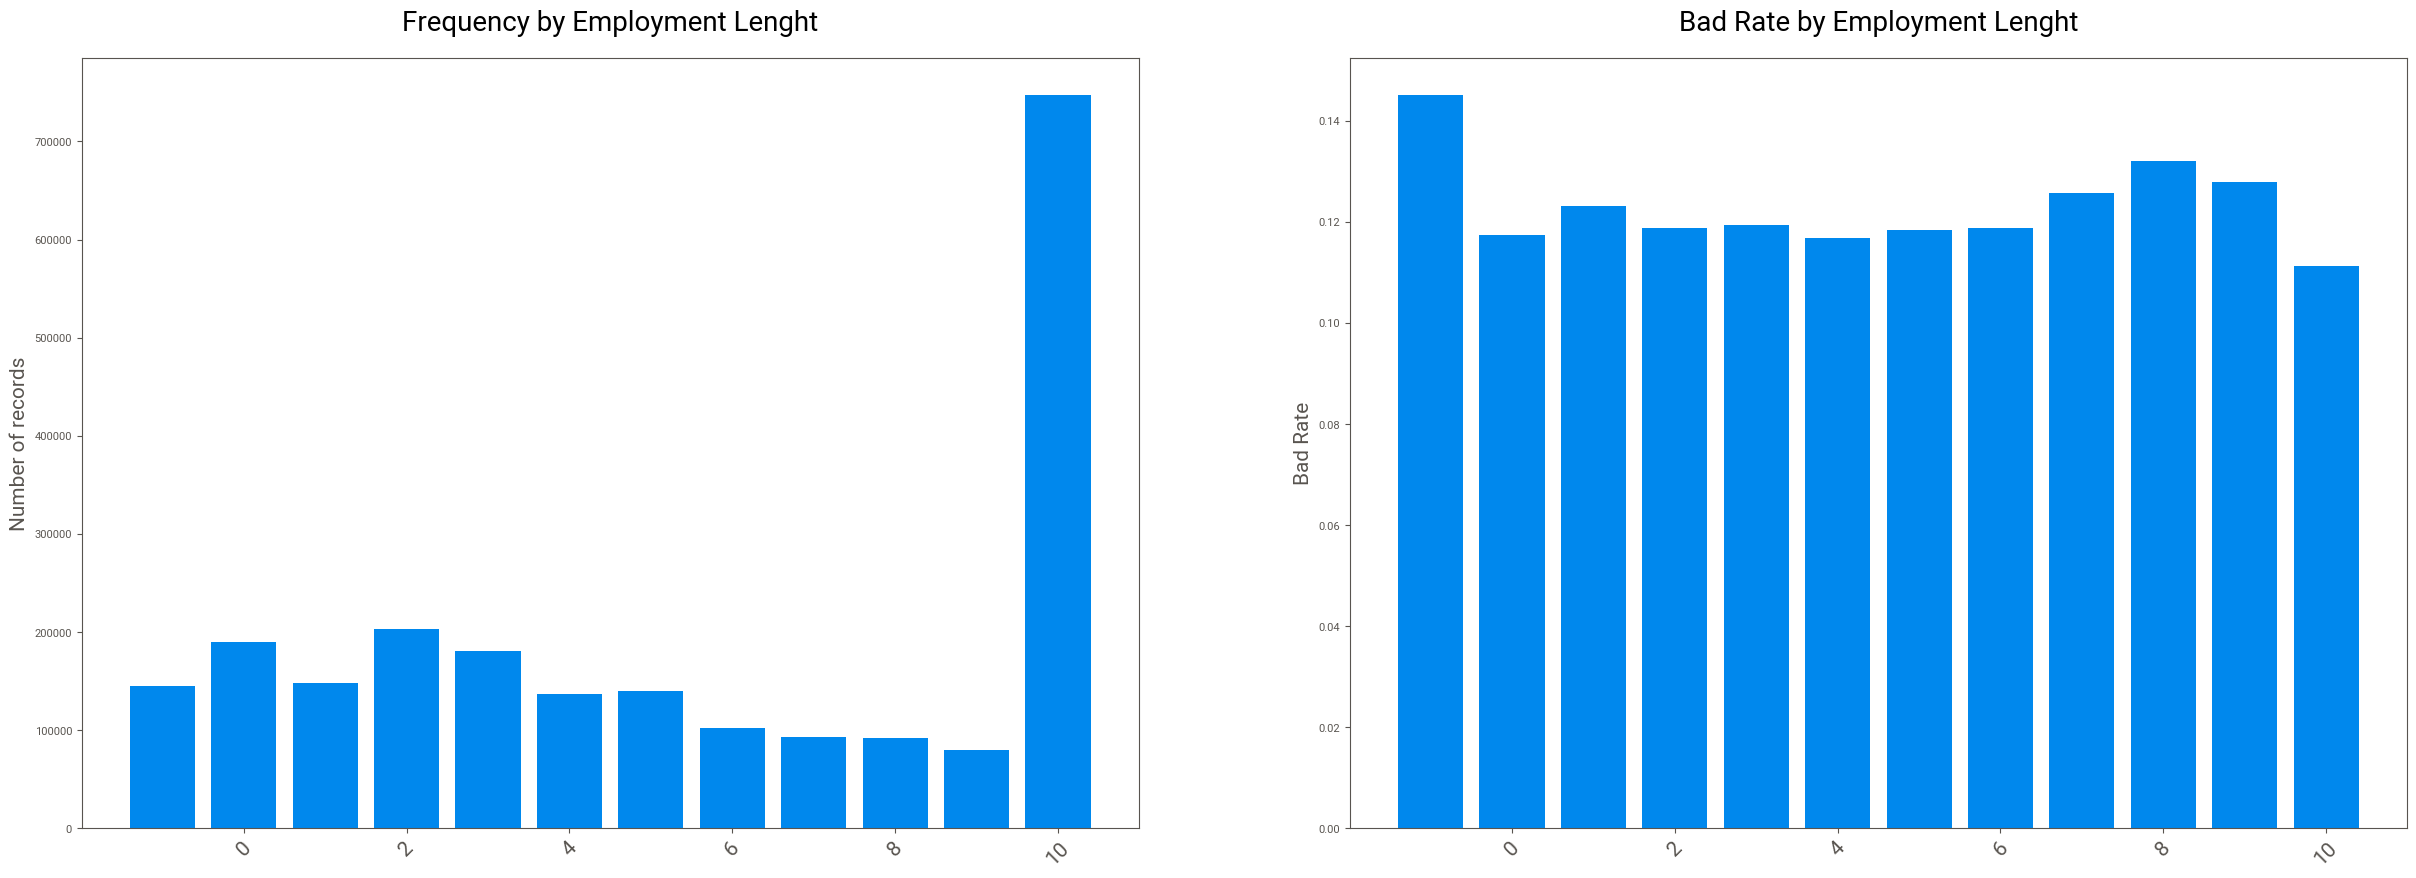

In [38]:
#Generate a distribution of emp_length_mapped 
dfRaceCount = pd.DataFrame(df4.groupby("emp_length_mapped")['y'].agg('count')).reset_index()
dfRaceAvg = pd.DataFrame(df4.groupby("emp_length_mapped")['y'].agg('mean')).reset_index()

fig, ax = plt.subplots(1,2, figsize = (30, 10))
histCatVariablesCount(0,dfRaceCount['emp_length_mapped'],dfRaceCount.y,"Frequency by Employment Lenght")
histCatVariablesBadRate(1,dfRaceAvg['emp_length_mapped'],dfRaceAvg.y,"Bad Rate by Employment Lenght")


As it can be seen, the missing values (mapped to -1) correspond to the population with highest credit risk

In [39]:
# Inpute NaNs in months since delinquency/derog columns by 999 (missing values correspond to population who were never delinquent/derog)
columns_to_impute = ['mths_since_last_delinq', 'mths_since_last_record','mths_since_last_major_derog','mths_since_recent_bc_dlq','mths_since_recent_revol_delinq','mths_since_recent_inq']

# Impute missing values with 999
df4[columns_to_impute] = df4[columns_to_impute].fillna(999)

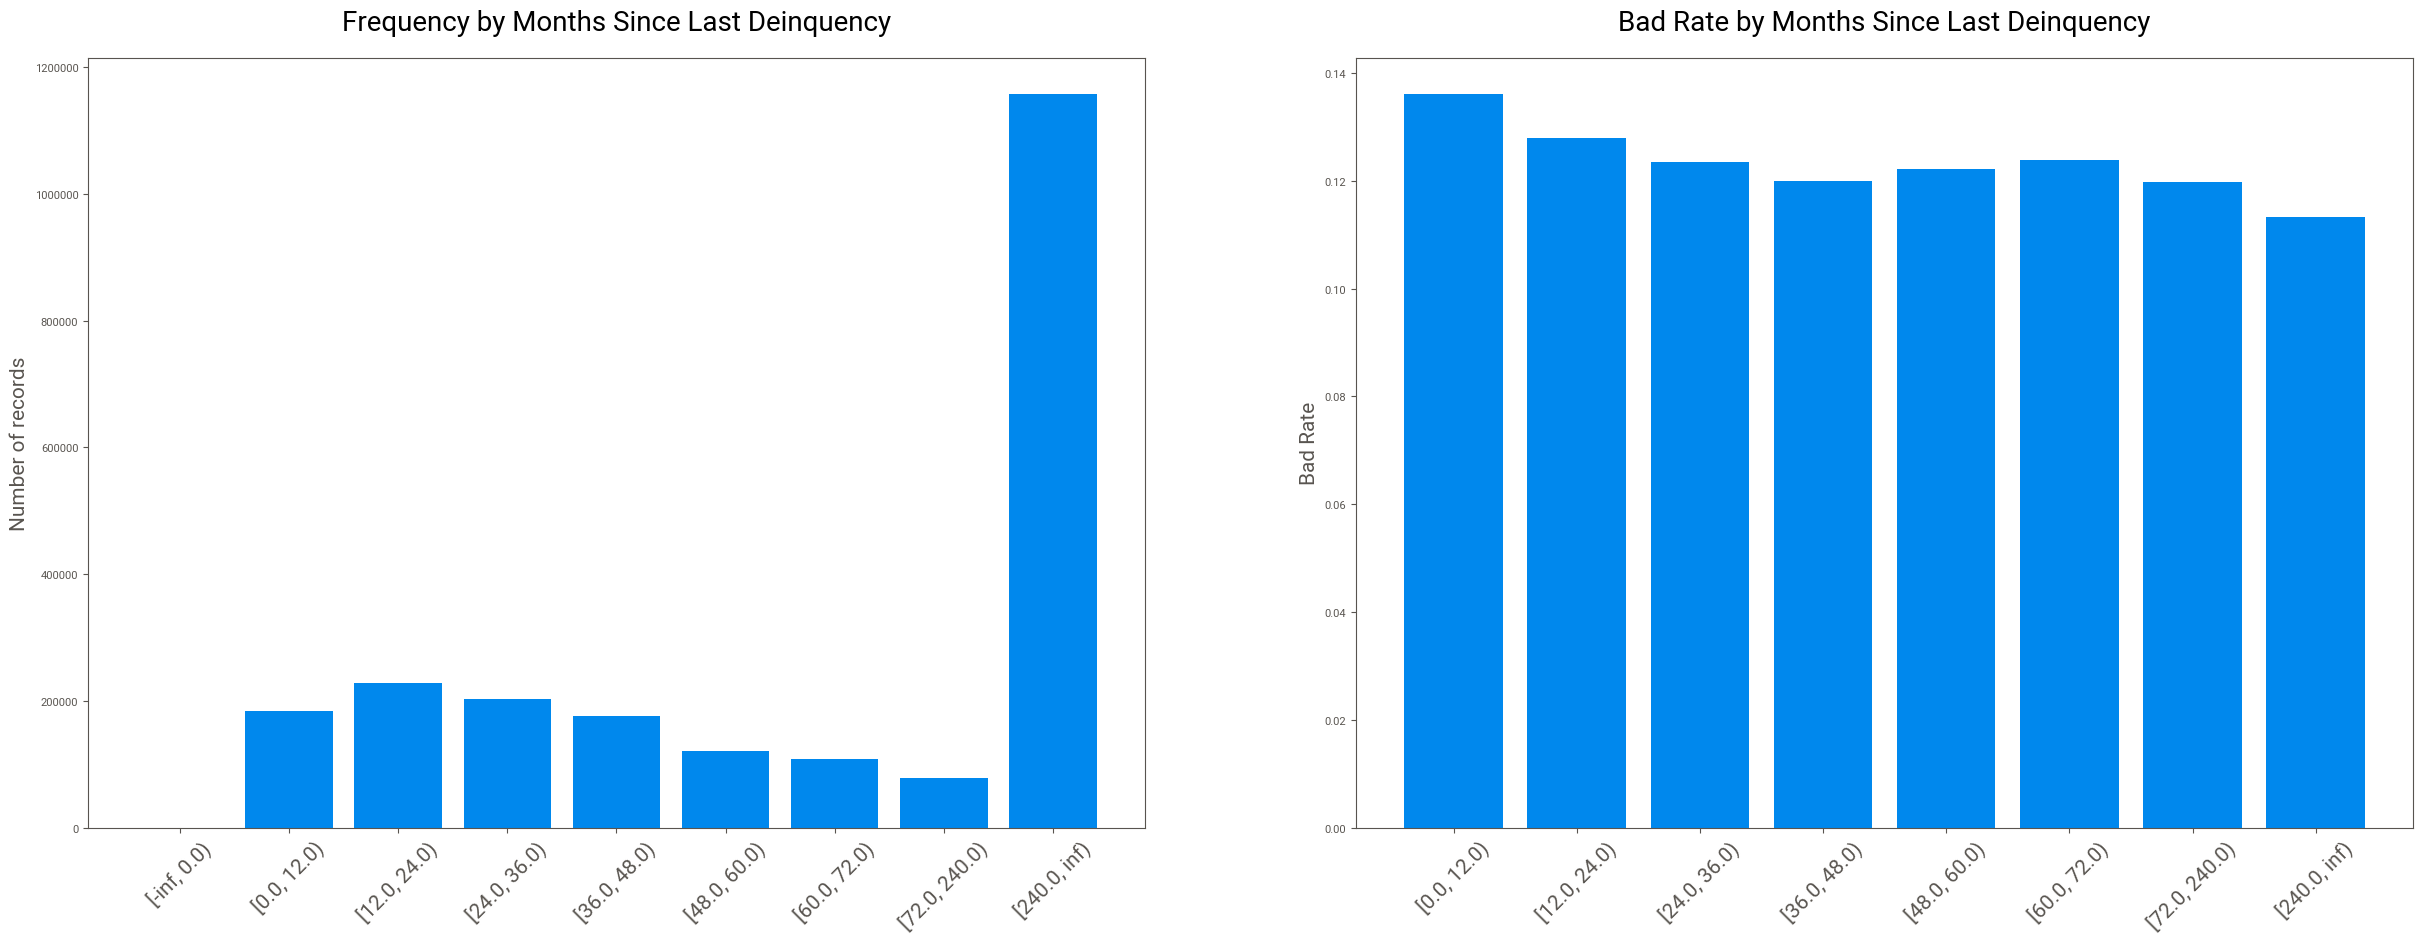

In [40]:
#Generate a distribution of mths_since_last_delinq
Binning = [-float("inf"),0,12, 24, 36, 48, 60, 72,240,float("inf")]
df4['mths_since_last_delinq_Bin'] = pd.cut(x=df4['mths_since_last_delinq'],right=False,bins = Binning)

# Get the count of bins for Good (y == 0), sort, and rename columns
dfGood  = (
    df4[df4['y'] == 0]['mths_since_last_delinq_Bin'].value_counts()  # Get the value counts 
    .to_frame(name="Perc")                                   # Create a DataFrame with the 'Perc' column
    .sort_index()                                            # Sort by index (the bins)
    .reset_index()                                           # Reset index to turn bins into a column
    .rename(columns={"mths_since_last_delinq_Bin": "mths_since_last_delinqBin"})                       # Rename columns
)

# Get the count of  bins for Bad (y == 1), sort, and rename columns
dfBad = (
    df4[df4['y'] == 1]['mths_since_last_delinq_Bin'].value_counts()  # Get the value counts 
    .to_frame(name="Perc")                                   # Create a DataFrame with the 'Perc' column
    .sort_index()                                            # Sort by index (the bins)
    .reset_index()                                           # Reset index to turn bins into a column
    .rename(columns={"mths_since_last_delinq_Bin": "mths_since_last_delinqBin"})                       # Rename columns
)

dfGood['mths_since_last_delinqBin'] = dfGood['mths_since_last_delinqBin'].astype(str)
dfBad['mths_since_last_delinqBin'] = dfBad['mths_since_last_delinqBin'].astype(str)
dfPriceIndex = pd.merge(dfGood,dfBad, on = "mths_since_last_delinqBin").rename(columns = {"Perc_x":"Good","Perc_y":"Bad"})
dfPriceIndex['BadRate'] = dfPriceIndex['Bad']/(dfPriceIndex['Bad'] + dfPriceIndex['Good'])
dfPriceIndex['total'] = (dfPriceIndex['Good'] + dfPriceIndex['Bad'])

fig, ax = plt.subplots(1,2, figsize = (30, 10))
histCatVariablesCount(0,dfPriceIndex.mths_since_last_delinqBin,dfPriceIndex.total,"Frequency by Months Since Last Deinquency")
histCatVariablesBadRate(1,dfPriceIndex.mths_since_last_delinqBin,dfPriceIndex.BadRate,"Bad Rate by Months Since Last Deinquency")

As it can be seen, the missing values (mapped to 999) correspond to population of consumers who were never delinquent, hence demonstrate lowest credit risk

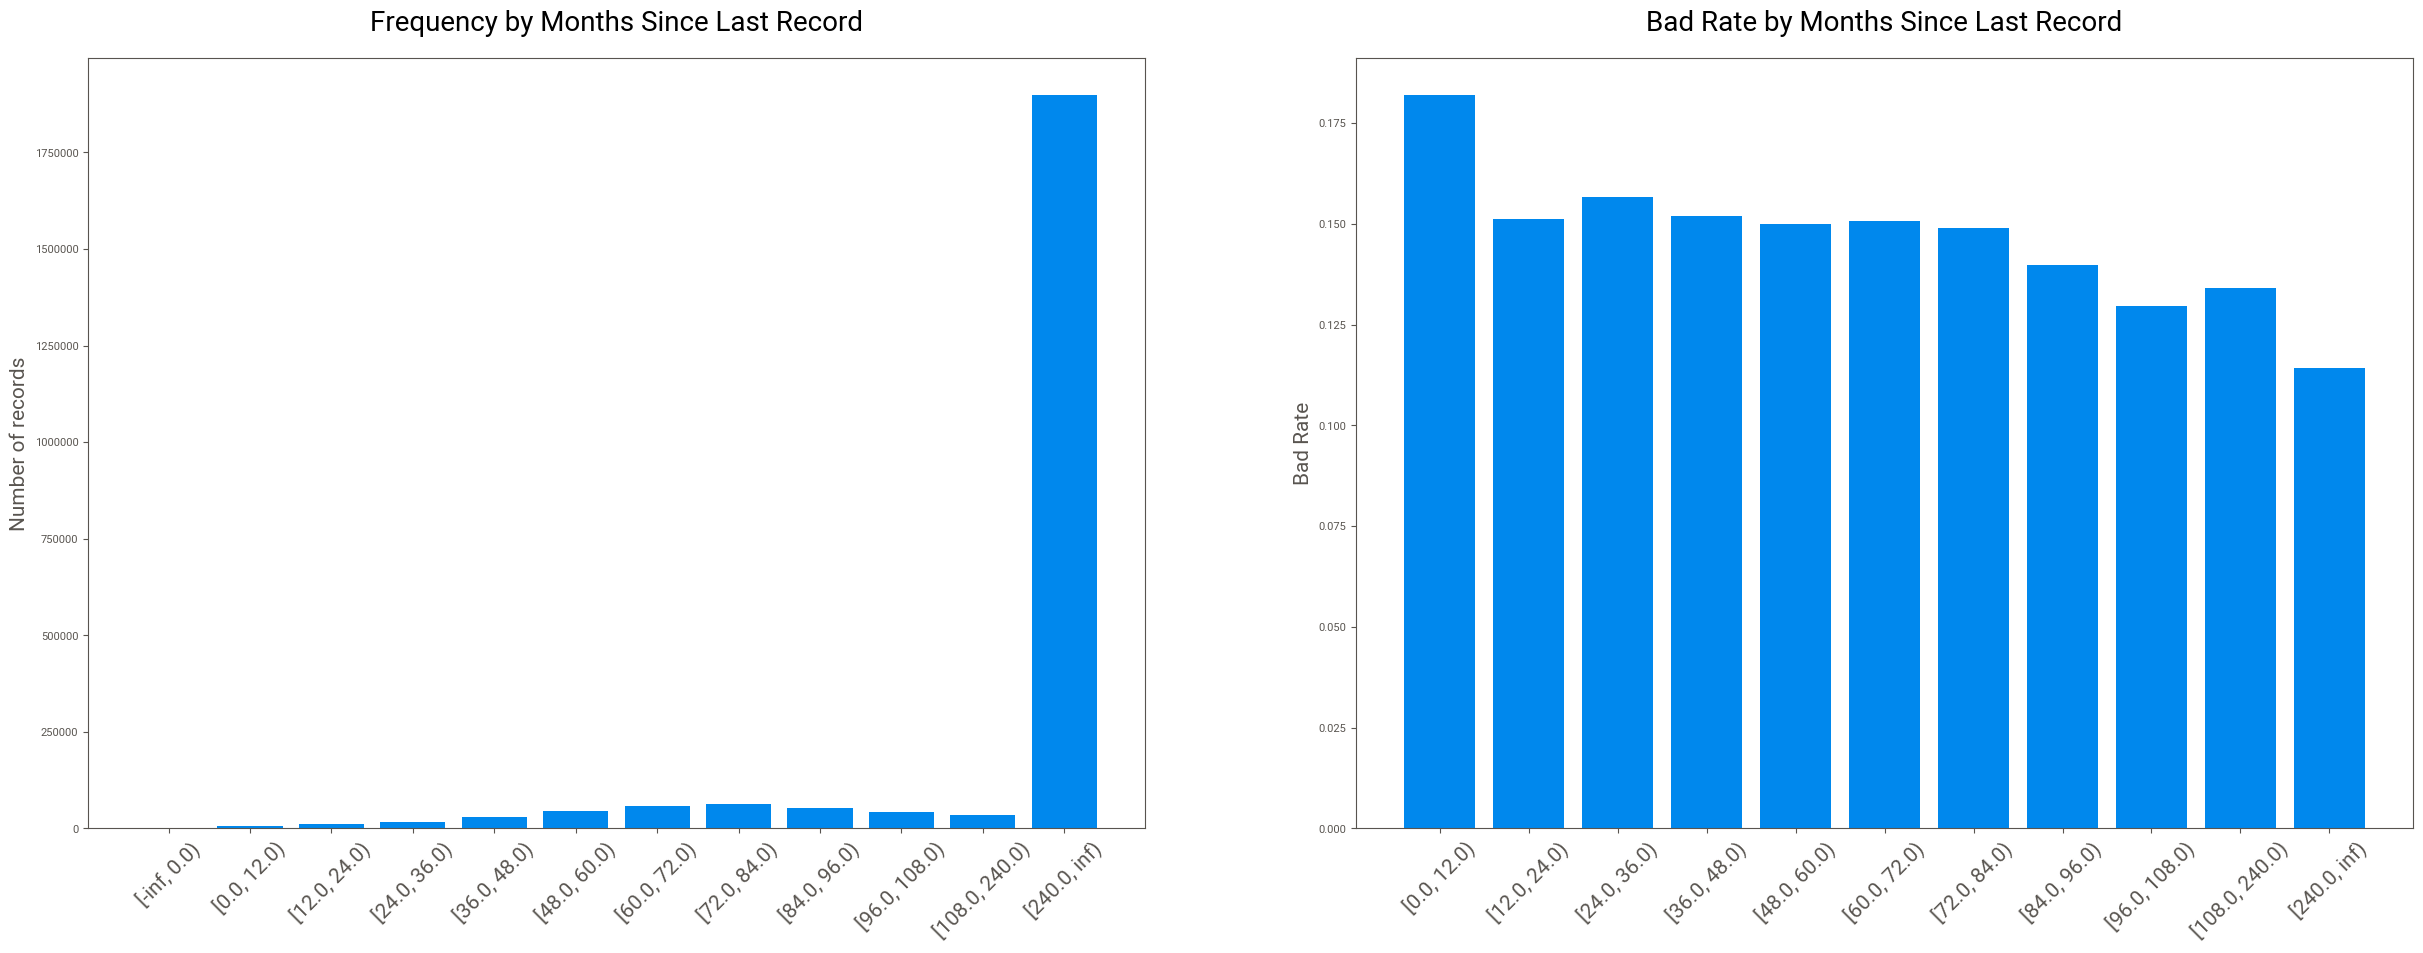

In [41]:
#Generate a distribution of mths_since_last_record
Binning = [-float("inf"),0,12, 24, 36, 48, 60, 72, 84, 96, 108,240,float("inf")]
df4['mths_since_last_record_Bin'] = pd.cut(x=df4['mths_since_last_record'],right=False,bins = Binning)

# Get the count of bins for Good (y == 0), sort, and rename columns
dfGood  = (
    df4[df4['y'] == 0]['mths_since_last_record_Bin'].value_counts()  # Get the value counts 
    .to_frame(name="Perc")                                   # Create a DataFrame with the 'Perc' column
    .sort_index()                                            # Sort by index (the bins)
    .reset_index()                                           # Reset index to turn bins into a column
    .rename(columns={"mths_since_last_record_Bin": "mths_since_last_recordBin"})                       # Rename columns
)

# Get the count of  bins for Bad (y == 1), sort, and rename columns
dfBad = (
    df4[df4['y'] == 1]['mths_since_last_record_Bin'].value_counts()  # Get the value counts 
    .to_frame(name="Perc")                                   # Create a DataFrame with the 'Perc' column
    .sort_index()                                            # Sort by index (the bins)
    .reset_index()                                           # Reset index to turn bins into a column
    .rename(columns={"mths_since_last_record_Bin": "mths_since_last_recordBin"})                       # Rename columns
)

dfGood['mths_since_last_recordBin'] = dfGood['mths_since_last_recordBin'].astype(str)
dfBad['mths_since_last_recordBin'] = dfBad['mths_since_last_recordBin'].astype(str)
dfPriceIndex = pd.merge(dfGood,dfBad, on = "mths_since_last_recordBin").rename(columns = {"Perc_x":"Good","Perc_y":"Bad"})
dfPriceIndex['BadRate'] = dfPriceIndex['Bad']/(dfPriceIndex['Bad'] + dfPriceIndex['Good'])
dfPriceIndex['total'] = (dfPriceIndex['Good'] + dfPriceIndex['Bad'])

fig, ax = plt.subplots(1,2, figsize = (30, 10))
histCatVariablesCount(0,dfPriceIndex.mths_since_last_recordBin,dfPriceIndex.total,"Frequency by Months Since Last Record")
histCatVariablesBadRate(1,dfPriceIndex.mths_since_last_recordBin,dfPriceIndex.BadRate,"Bad Rate by Months Since Last Record")

As it can be seen, the missing values (mapped to 999) correspond to population of consumers who never had public record, hence demonstrate lowest credit risk

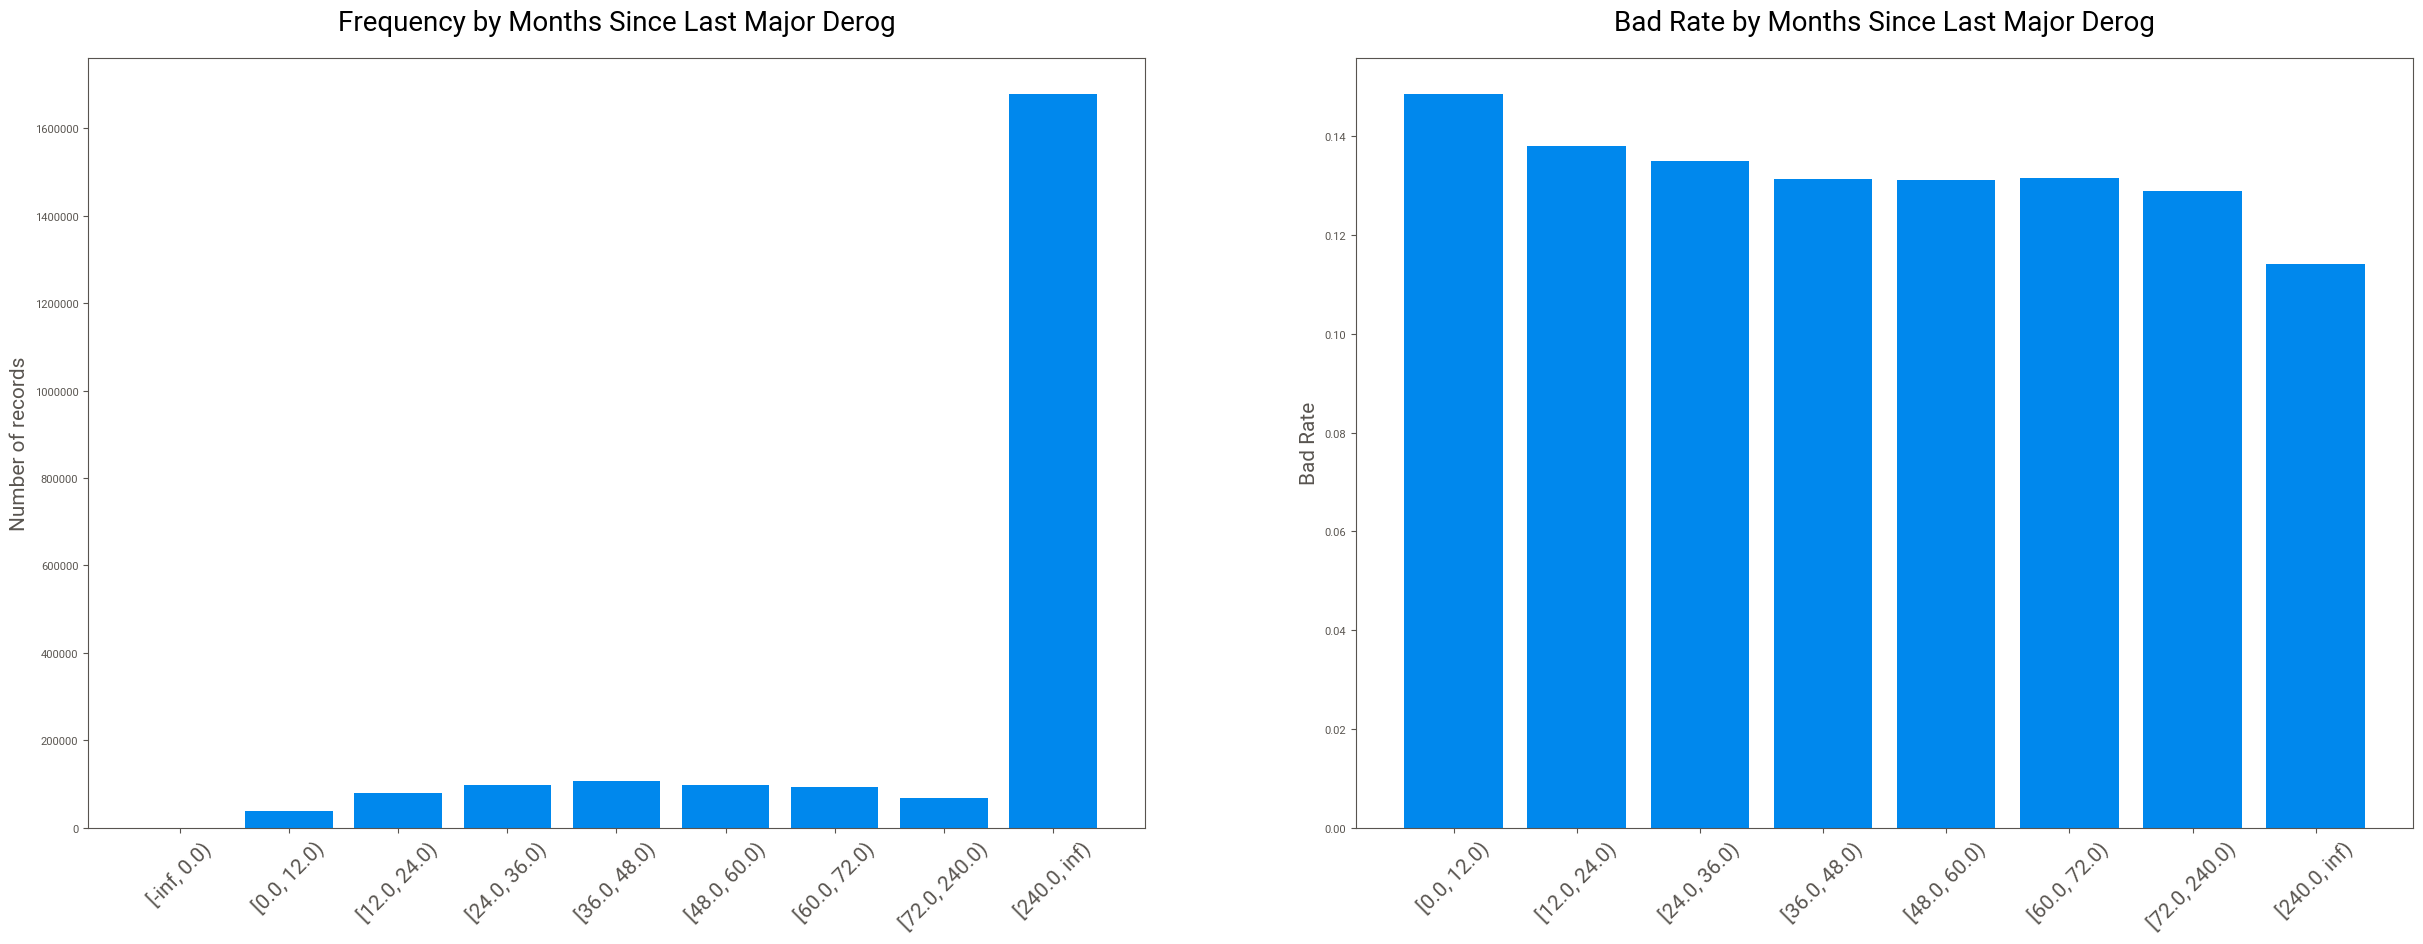

In [42]:
#Generate a distribution of mths_since_last_major_derog
Binning = [-float("inf"),0,12, 24, 36, 48, 60, 72,240,float("inf")]
df4['mths_since_last_major_derog_Bin'] = pd.cut(x=df4['mths_since_last_major_derog'],right=False,bins = Binning)

# Get the count of bins for Good (y == 0), sort, and rename columns
dfGood  = (
    df4[df4['y'] == 0]['mths_since_last_major_derog_Bin'].value_counts()  # Get the value counts 
    .to_frame(name="Perc")                                   # Create a DataFrame with the 'Perc' column
    .sort_index()                                            # Sort by index (the bins)
    .reset_index()                                           # Reset index to turn bins into a column
    .rename(columns={"mths_since_last_major_derog_Bin": "mths_since_last_major_derogBin"})                       # Rename columns
)

# Get the count of  bins for Bad (y == 1), sort, and rename columns
dfBad = (
    df4[df4['y'] == 1]['mths_since_last_major_derog_Bin'].value_counts()  # Get the value counts 
    .to_frame(name="Perc")                                   # Create a DataFrame with the 'Perc' column
    .sort_index()                                            # Sort by index (the bins)
    .reset_index()                                           # Reset index to turn bins into a column
    .rename(columns={"mths_since_last_major_derog_Bin": "mths_since_last_major_derogBin"})                       # Rename columns
)

dfGood['mths_since_last_major_derogBin'] = dfGood['mths_since_last_major_derogBin'].astype(str)
dfBad['mths_since_last_major_derogBin'] = dfBad['mths_since_last_major_derogBin'].astype(str)
dfPriceIndex = pd.merge(dfGood,dfBad, on = "mths_since_last_major_derogBin").rename(columns = {"Perc_x":"Good","Perc_y":"Bad"})
dfPriceIndex['BadRate'] = dfPriceIndex['Bad']/(dfPriceIndex['Bad'] + dfPriceIndex['Good'])
dfPriceIndex['total'] = (dfPriceIndex['Good'] + dfPriceIndex['Bad'])

fig, ax = plt.subplots(1,2, figsize = (30, 10))
histCatVariablesCount(0,dfPriceIndex.mths_since_last_major_derogBin,dfPriceIndex.total,"Frequency by Months Since Last Major Derog")
histCatVariablesBadRate(1,dfPriceIndex.mths_since_last_major_derogBin,dfPriceIndex.BadRate,"Bad Rate by Months Since Last Major Derog")

As it can be seen, the missing values (mapped to 999) correspond to population of consumers who never had derogatory record, hence demonstrate lowest credit risk

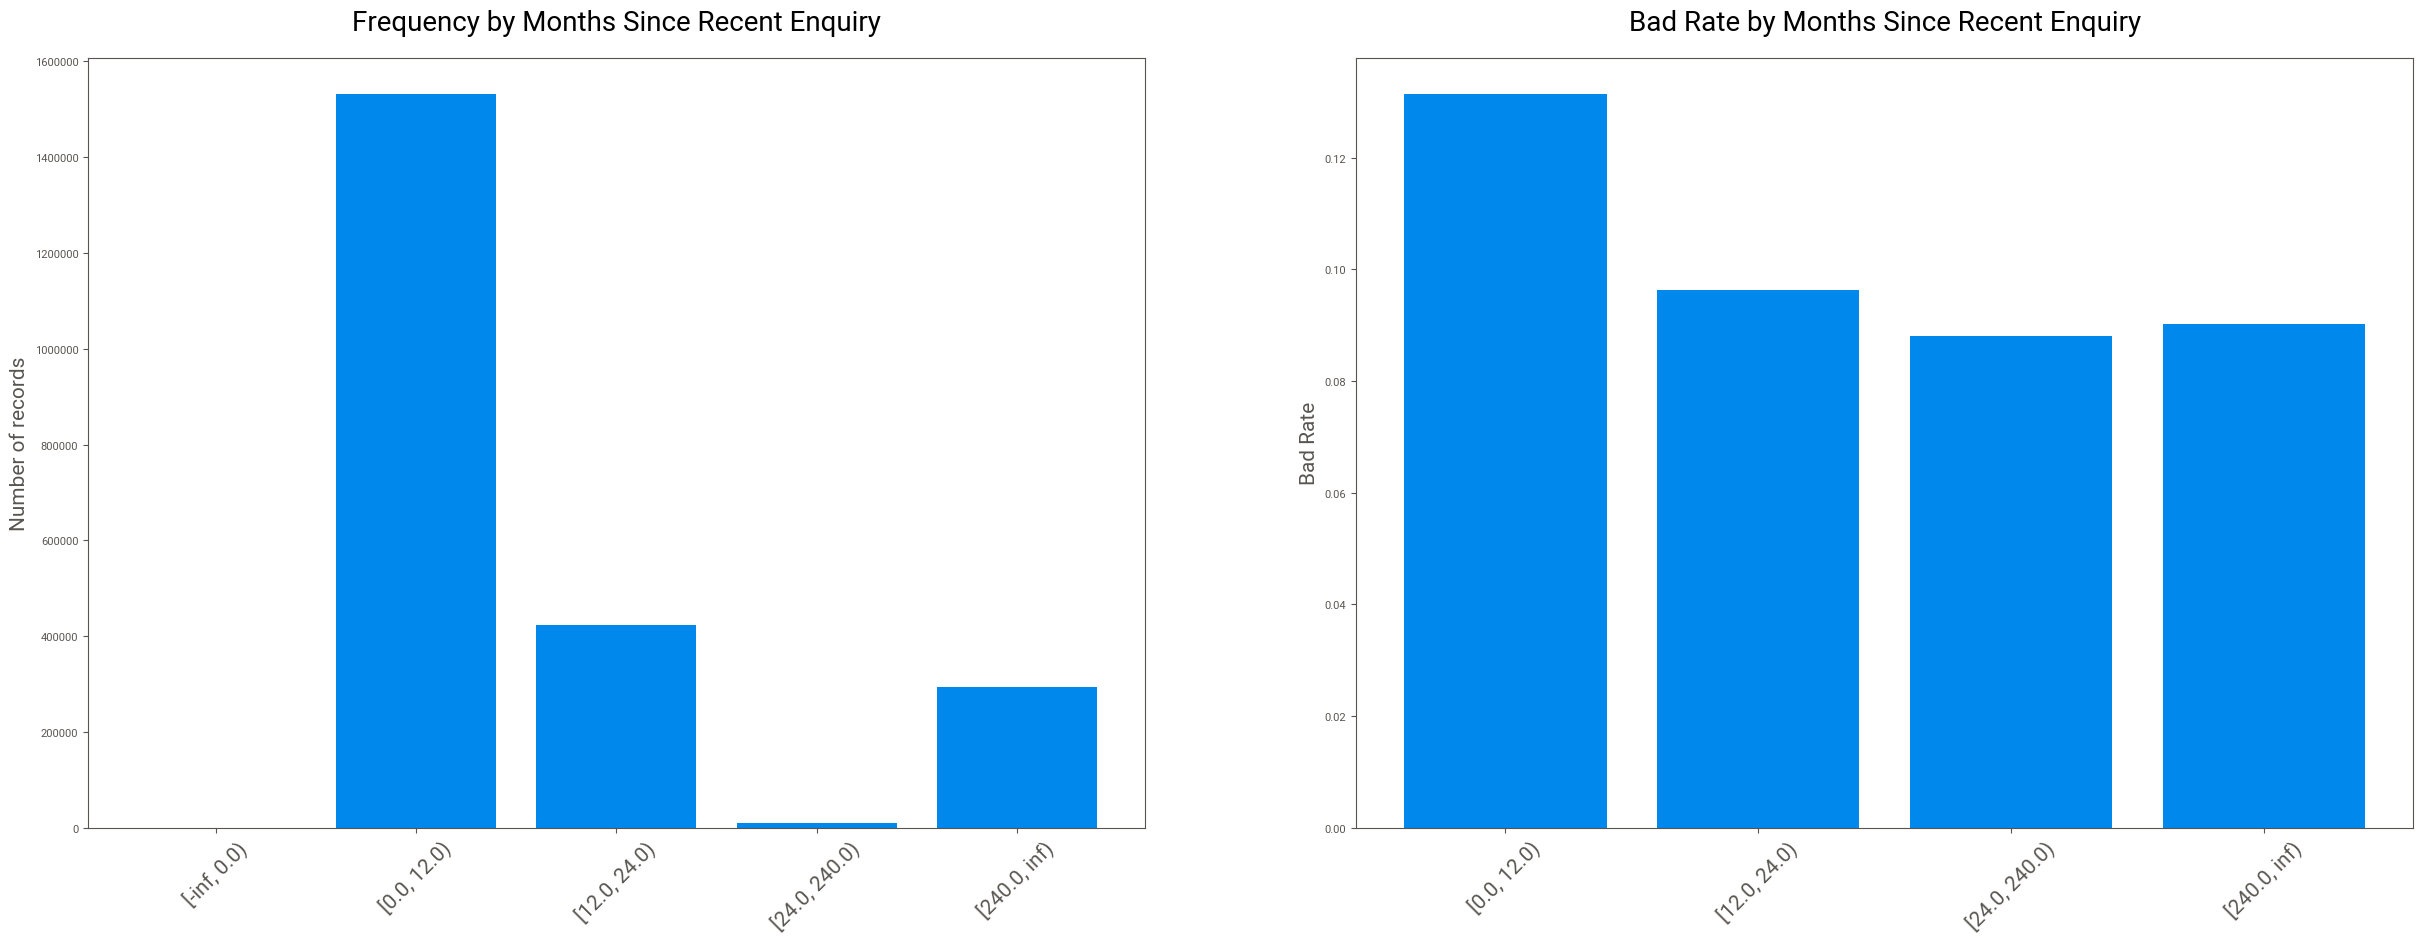

In [43]:
#Generate a distribution of mths_since_recent_inq
Binning = [-float("inf"),0,12, 24,240,float("inf")]
df4['mths_since_recent_inq_Bin'] = pd.cut(x=df4['mths_since_recent_inq'],right=False,bins = Binning)

# Get the count of bins for Good (y == 0), sort, and rename columns
dfGood  = (
    df4[df4['y'] == 0]['mths_since_recent_inq_Bin'].value_counts()  # Get the value counts 
    .to_frame(name="Perc")                                   # Create a DataFrame with the 'Perc' column
    .sort_index()                                            # Sort by index (the bins)
    .reset_index()                                           # Reset index to turn bins into a column
    .rename(columns={"mths_since_recent_inq_Bin": "mths_since_recent_inqBin"})                       # Rename columns
)

# Get the count of  bins for Bad (y == 1), sort, and rename columns
dfBad = (
    df4[df4['y'] == 1]['mths_since_recent_inq_Bin'].value_counts()  # Get the value counts 
    .to_frame(name="Perc")                                   # Create a DataFrame with the 'Perc' column
    .sort_index()                                            # Sort by index (the bins)
    .reset_index()                                           # Reset index to turn bins into a column
    .rename(columns={"mths_since_recent_inq_Bin": "mths_since_recent_inqBin"})                       # Rename columns
)

dfGood['mths_since_recent_inqBin'] = dfGood['mths_since_recent_inqBin'].astype(str)
dfBad['mths_since_recent_inqBin'] = dfBad['mths_since_recent_inqBin'].astype(str)
dfPriceIndex = pd.merge(dfGood,dfBad, on = "mths_since_recent_inqBin").rename(columns = {"Perc_x":"Good","Perc_y":"Bad"})
dfPriceIndex['BadRate'] = dfPriceIndex['Bad']/(dfPriceIndex['Bad'] + dfPriceIndex['Good'])
dfPriceIndex['total'] = (dfPriceIndex['Good'] + dfPriceIndex['Bad'])

fig, ax = plt.subplots(1,2, figsize = (30, 10))
histCatVariablesCount(0,dfPriceIndex.mths_since_recent_inqBin,dfPriceIndex.total,"Frequency by Months Since Recent Enquiry")
histCatVariablesBadRate(1,dfPriceIndex.mths_since_recent_inqBin,dfPriceIndex.BadRate,"Bad Rate by Months Since Recent Enquiry")

As it can be seen, the missing values (mapped to 999) correspond to population of consumers who never had inquiries, hence demonstrate lowest credit risk

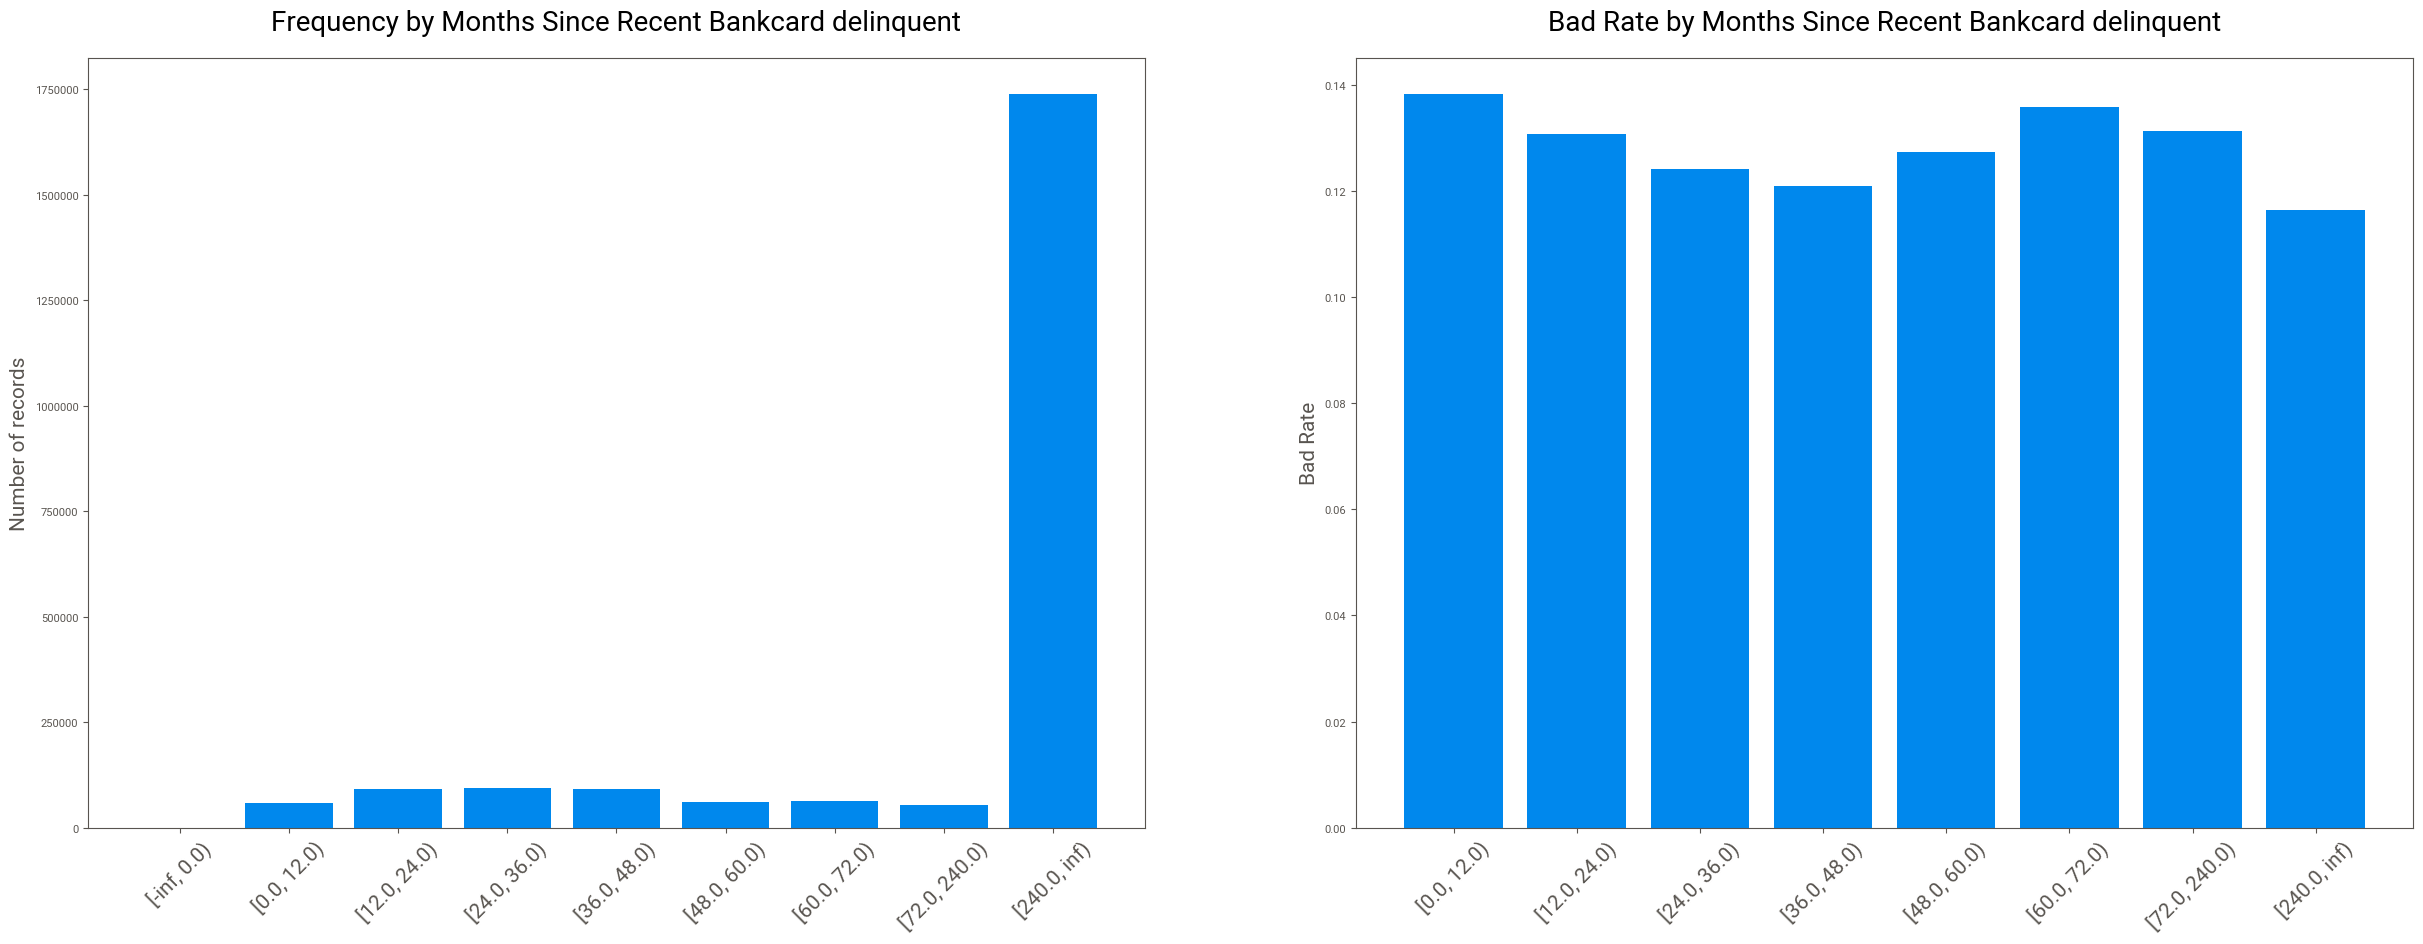

In [44]:
#Generate a distribution of mths_since_recent_bc_dlq
Binning = [-float("inf"),0,12, 24, 36, 48, 60, 72,240,float("inf")]
df4['mths_since_recent_bc_dlq_Bin'] = pd.cut(x=df4['mths_since_recent_bc_dlq'],right=False,bins = Binning)

# Get the count of bins for Good (y == 0), sort, and rename columns
dfGood  = (
    df4[df4['y'] == 0]['mths_since_recent_bc_dlq_Bin'].value_counts()  # Get the value counts 
    .to_frame(name="Perc")                                   # Create a DataFrame with the 'Perc' column
    .sort_index()                                            # Sort by index (the bins)
    .reset_index()                                           # Reset index to turn bins into a column
    .rename(columns={"mths_since_recent_bc_dlq_Bin": "mths_since_recent_bc_dlqBin"})                       # Rename columns
)

# Get the count of  bins for Bad (y == 1), sort, and rename columns
dfBad = (
    df4[df4['y'] == 1]['mths_since_recent_bc_dlq_Bin'].value_counts()  # Get the value counts 
    .to_frame(name="Perc")                                   # Create a DataFrame with the 'Perc' column
    .sort_index()                                            # Sort by index (the bins)
    .reset_index()                                           # Reset index to turn bins into a column
    .rename(columns={"mths_since_recent_bc_dlq_Bin": "mths_since_recent_bc_dlqBin"})                       # Rename columns
)

dfGood['mths_since_recent_bc_dlqBin'] = dfGood['mths_since_recent_bc_dlqBin'].astype(str)
dfBad['mths_since_recent_bc_dlqBin'] = dfBad['mths_since_recent_bc_dlqBin'].astype(str)
dfPriceIndex = pd.merge(dfGood,dfBad, on = "mths_since_recent_bc_dlqBin").rename(columns = {"Perc_x":"Good","Perc_y":"Bad"})
dfPriceIndex['BadRate'] = dfPriceIndex['Bad']/(dfPriceIndex['Bad'] + dfPriceIndex['Good'])
dfPriceIndex['total'] = (dfPriceIndex['Good'] + dfPriceIndex['Bad'])

fig, ax = plt.subplots(1,2, figsize = (30, 10))
histCatVariablesCount(0,dfPriceIndex.mths_since_recent_bc_dlqBin,dfPriceIndex.total,"Frequency by Months Since Recent Bankcard delinquent")
histCatVariablesBadRate(1,dfPriceIndex.mths_since_recent_bc_dlqBin,dfPriceIndex.BadRate,"Bad Rate by Months Since Recent Bankcard delinquent")

As it can be seen, the missing values (mapped to 999) correspond to population of consumers who never had Bankcard delinquency, hence demonstrate lowest credit risk

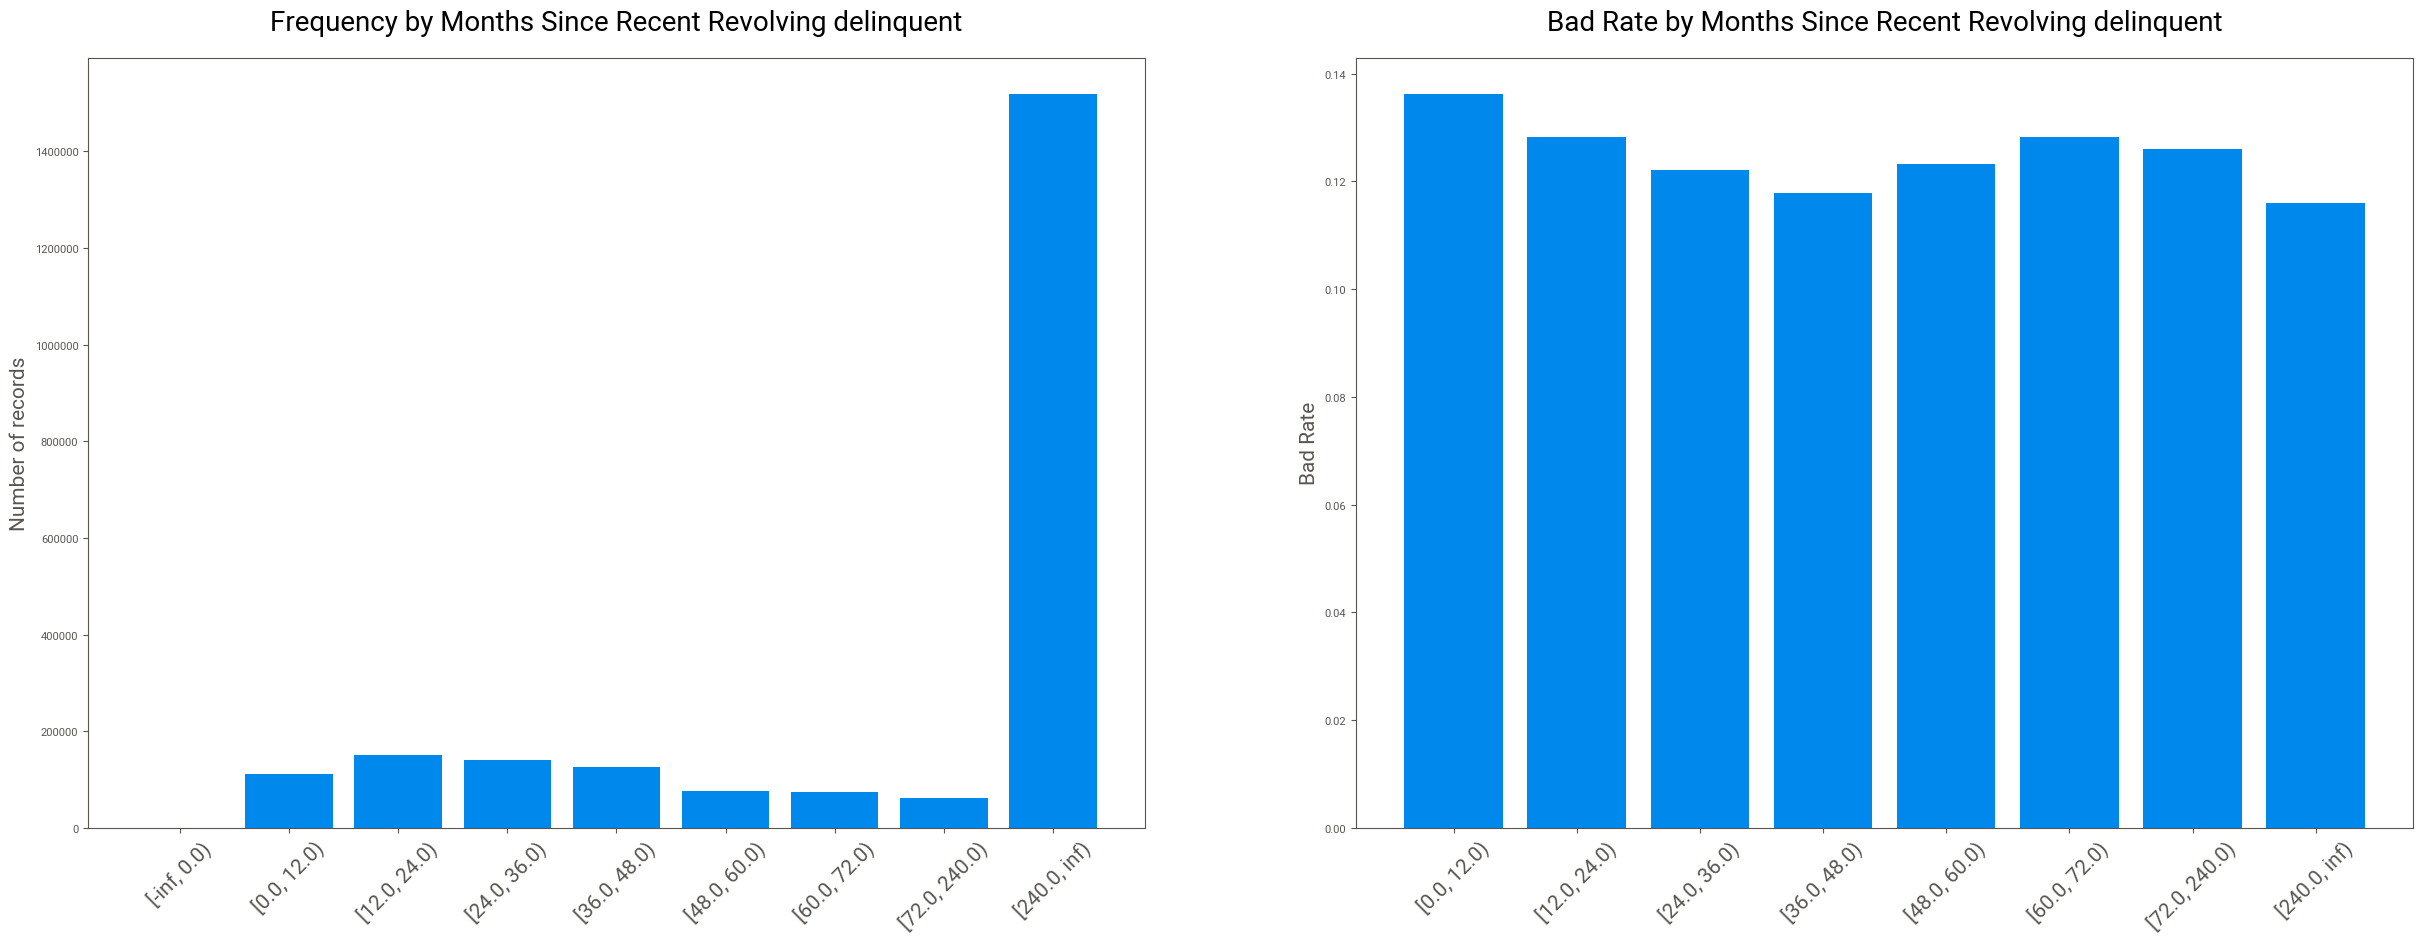

In [45]:
#Generate a distribution of mths_since_recent_revol_delinq
Binning = [-float("inf"),0,12, 24, 36, 48, 60, 72,240,float("inf")]
df4['mths_since_recent_revol_delinq_Bin'] = pd.cut(x=df4['mths_since_recent_revol_delinq'],right=False,bins = Binning)

# Get the count of bins for Good (y == 0), sort, and rename columns
dfGood  = (
    df4[df4['y'] == 0]['mths_since_recent_revol_delinq_Bin'].value_counts()  # Get the value counts 
    .to_frame(name="Perc")                                   # Create a DataFrame with the 'Perc' column
    .sort_index()                                            # Sort by index (the bins)
    .reset_index()                                           # Reset index to turn bins into a column
    .rename(columns={"mths_since_recent_revol_delinq_Bin": "mths_since_recent_revol_delinqBin"})                       # Rename columns
)

# Get the count of  bins for Bad (y == 1), sort, and rename columns
dfBad = (
    df4[df4['y'] == 1]['mths_since_recent_revol_delinq_Bin'].value_counts()  # Get the value counts 
    .to_frame(name="Perc")                                   # Create a DataFrame with the 'Perc' column
    .sort_index()                                            # Sort by index (the bins)
    .reset_index()                                           # Reset index to turn bins into a column
    .rename(columns={"mths_since_recent_revol_delinq_Bin": "mths_since_recent_revol_delinqBin"})                       # Rename columns
)

dfGood['mths_since_recent_revol_delinqBin'] = dfGood['mths_since_recent_revol_delinqBin'].astype(str)
dfBad['mths_since_recent_revol_delinqBin'] = dfBad['mths_since_recent_revol_delinqBin'].astype(str)
dfPriceIndex = pd.merge(dfGood,dfBad, on = "mths_since_recent_revol_delinqBin").rename(columns = {"Perc_x":"Good","Perc_y":"Bad"})
dfPriceIndex['BadRate'] = dfPriceIndex['Bad']/(dfPriceIndex['Bad'] + dfPriceIndex['Good'])
dfPriceIndex['total'] = (dfPriceIndex['Good'] + dfPriceIndex['Bad'])

fig, ax = plt.subplots(1,2, figsize = (30, 10))
histCatVariablesCount(0,dfPriceIndex.mths_since_recent_revol_delinqBin,dfPriceIndex.total,"Frequency by Months Since Recent Revolving delinquent")
histCatVariablesBadRate(1,dfPriceIndex.mths_since_recent_revol_delinqBin,dfPriceIndex.BadRate,"Bad Rate by Months Since Recent Revolving delinquent")

'mths_since_recent_bc_dlq' is very similar to 'mths_since_recent_revol_delinq', hence can be removed.

In [46]:
# Delete varibles which were binned as well as mths_since_recent_bc_dlq
DeleteList=['mths_since_last_delinq_Bin',
'mths_since_last_record_Bin',
'mths_since_last_major_derog_Bin',
'mths_since_recent_inq_Bin',
'mths_since_recent_bc_dlq_Bin',
'mths_since_recent_revol_delinq_Bin', 
'mths_since_recent_bc_dlq'
]
df5=df4.drop(DeleteList, axis=1)
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2257045 entries, 0 to 2260698
Data columns (total 98 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   loan_amnt                       float64
 1   funded_amnt_inv                 float64
 2   int_rate                        float64
 3   installment                     float64
 4   annual_inc                      float64
 5   dti                             float64
 6   delinq_2yrs                     float64
 7   fico_range_low                  float64
 8   fico_range_high                 float64
 9   inq_last_6mths                  float64
 10  mths_since_last_delinq          float64
 11  mths_since_last_record          float64
 12  open_acc                        float64
 13  pub_rec                         float64
 14  revol_bal                       float64
 15  revol_util                      float64
 16  total_acc                       float64
 17  out_prncp_inv                   

In [47]:
# Check missing value count
print(df5.isnull().sum()) 

loan_amnt                              0
funded_amnt_inv                        0
int_rate                               0
installment                            0
annual_inc                             0
dti                                    0
delinq_2yrs                            0
fico_range_low                         0
fico_range_high                        0
inq_last_6mths                         0
mths_since_last_delinq                 0
mths_since_last_record                 0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
out_prncp_inv                          0
total_pymnt                            0
total_pymnt_inv                        0
last_pymnt_amnt                        0
last_fico_range_high                   0
last_fico_range_low                    0
collections_12_mths_ex_med             0
mths_since_last_

In [48]:
# Select only columns with no missing values
data_no_missing = df5.loc[:, df5.isnull().sum() == 0]
data_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2257045 entries, 0 to 2260698
Data columns (total 55 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   loan_amnt                       float64
 1   funded_amnt_inv                 float64
 2   int_rate                        float64
 3   installment                     float64
 4   annual_inc                      float64
 5   dti                             float64
 6   delinq_2yrs                     float64
 7   fico_range_low                  float64
 8   fico_range_high                 float64
 9   inq_last_6mths                  float64
 10  mths_since_last_delinq          float64
 11  mths_since_last_record          float64
 12  open_acc                        float64
 13  pub_rec                         float64
 14  revol_bal                       float64
 15  revol_util                      float64
 16  total_acc                       float64
 17  out_prncp_inv                   

## Step 7: Modeling - Logistic regression (Initial Analysis)

In [49]:
# Calculate number of of reecords wheere FICO score is 0 (unscorable records)
zero_count = (data_no_missing['last_fico_range_low'] == 0).sum()

print(f"Number of FICO scores that are 0: {zero_count}")

Number of FICO scores that are 0: 37280


In [50]:
# Remove unscoreble records from the dataset (so the conparison too FICO score is based on the same data)
data_no_missing_filt = data_no_missing[data_no_missing['last_fico_range_low'] != 0]
data_no_missing_filt.shape

(2219765, 55)

In [51]:
# Prepare data for modeling
X = data_no_missing_filt.drop(columns=['y'])
y = data_no_missing_filt['y']

# Split the data into training and testing sets
X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
#Drop FICO score variables from dataset leaving Consumer Data only
X_train = X_train1.loc[:, ~X_train1.columns.str.contains('fico')]
X_test = X_test1.loc[:, ~X_test1.columns.str.contains('fico')]

In [53]:
#Drop 'Investor-related' variables from dataset
X_train = X_train.loc[:, ~X_train.columns.str.contains('inv')]
X_test = X_test.loc[:, ~X_test.columns.str.contains('inv')]

X_train.shape
X_test.shape

(1553835, 47)

(665930, 47)

In [54]:
#Scale all the variables
transformer = make_column_transformer((StandardScaler(), list(X_train.columns)),
                                      remainder = 'passthrough' )

In [55]:
#Build a logistic regression pipeline
lgrPipe = Pipeline([('transformer',transformer),
                     ('lgr',LogisticRegression(random_state = 42))]).fit(X_train,y_train)

y_train_predicted = lgrPipe.predict(X_train)
y_test_predicted = lgrPipe.predict(X_test)

y_train_predicted_proba = lgrPipe.predict_proba(X_train)
y_test_predicted_proba = lgrPipe.predict_proba(X_test)

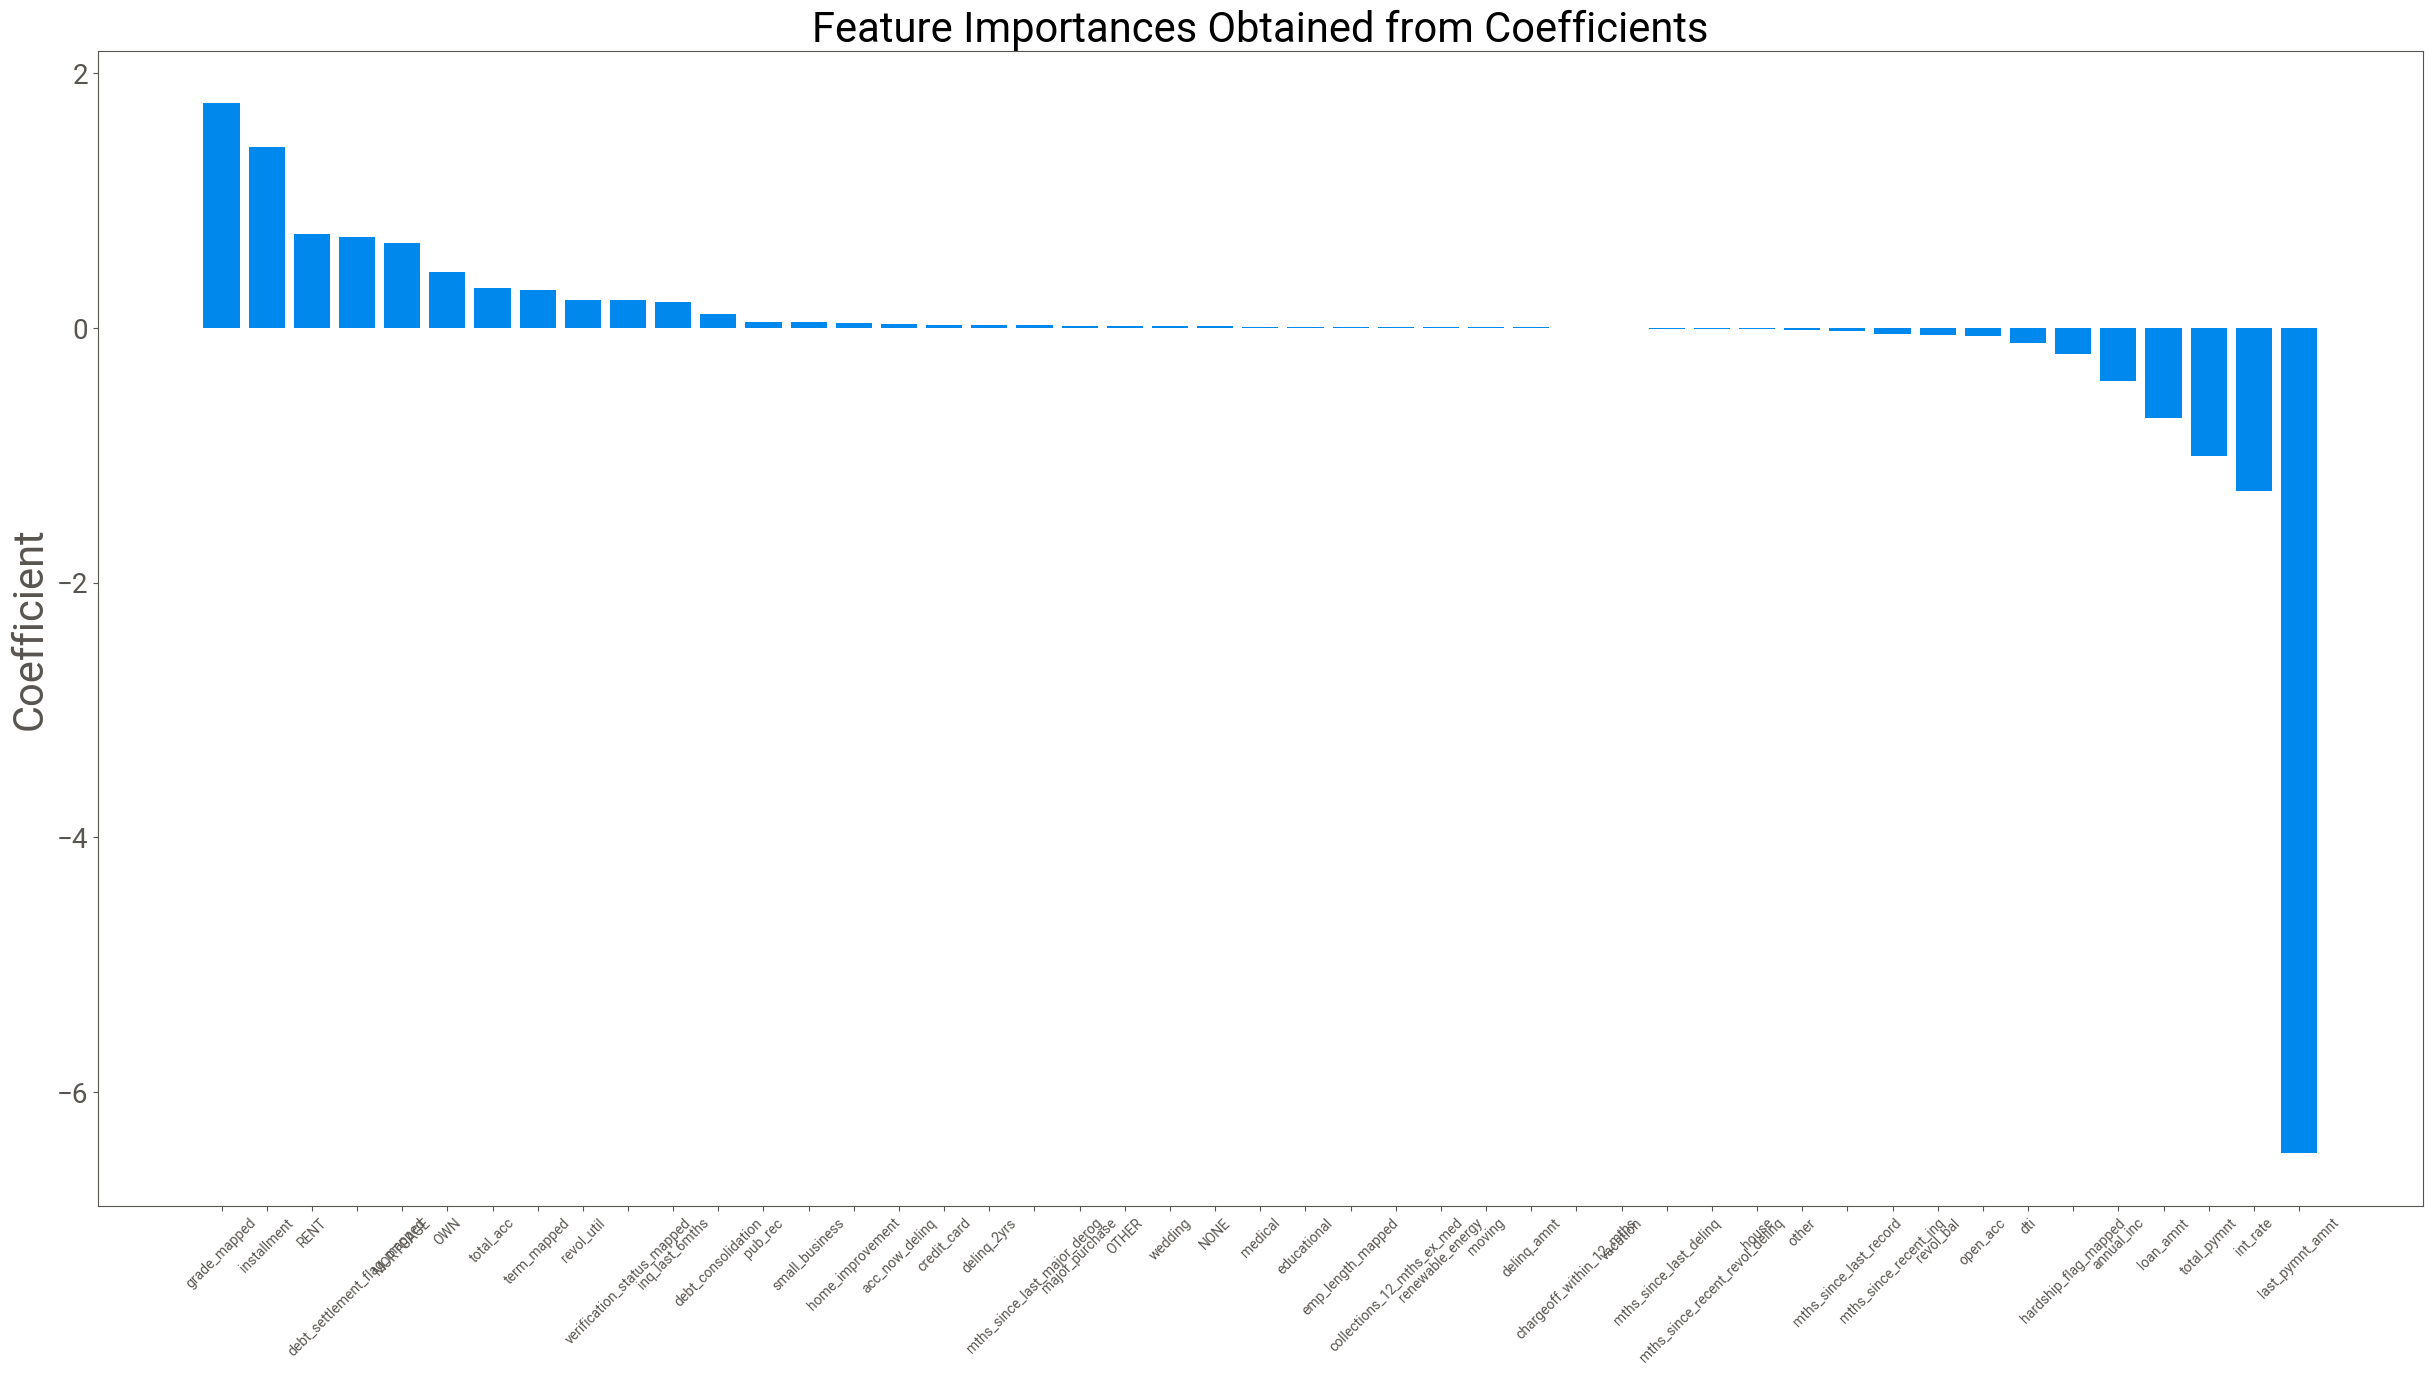

In [56]:
# Feature importance
importances = pd.DataFrame(data={
    'Feature': X_train.columns,
    'Importance': lgrPipe.named_steps["lgr"].coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

fig, ax = plt.subplots(1, figsize = (30, 15))
ax.bar(x=importances['Feature'], height=importances['Importance'])
ax.set_title('Feature Importances Obtained from Coefficients', size = 30)
ax.set_ylabel('Coefficient', fontsize = 30)
ax.tick_params(axis = 'x',labelrotation=45, labelsize=10)
ax.tick_params(axis = 'y', labelsize=20)
plt.show();

In [57]:
print(importances)

                           Feature  Importance
24                    grade_mapped    1.760942
2                      installment    1.417934
33                            RENT    0.737773
28     debt_settlement_flag_mapped    0.711528
29                        MORTGAGE    0.661293
32                             OWN    0.434962
13                       total_acc    0.308079
23                     term_mapped    0.297471
12                      revol_util    0.216653
26      verification_status_mapped    0.216197
6                   inq_last_6mths    0.198315
35              debt_consolidation    0.110211
10                         pub_rec    0.046314
44                  small_business    0.046308
37                home_improvement    0.036364
18                  acc_now_delinq    0.026617
34                     credit_card    0.021914
5                      delinq_2yrs    0.019947
17     mths_since_last_major_derog    0.016950
39                  major_purchase    0.016216
31           

#### The following groups of consumers may have a higher credit risk:
* Consumers assigned high risk grade (by credit bureau)
* Consumers with higher installment lines
* Consumers who Rent
* Consumers who were a part of debt settlement program
* Consumers who have more accounts
* Consumers who apply for longer term loan
* Consumers with higher utilization on revolving trades
* Consumer with higher number of inquiries in the last 6 months
* Consumers with lower payments



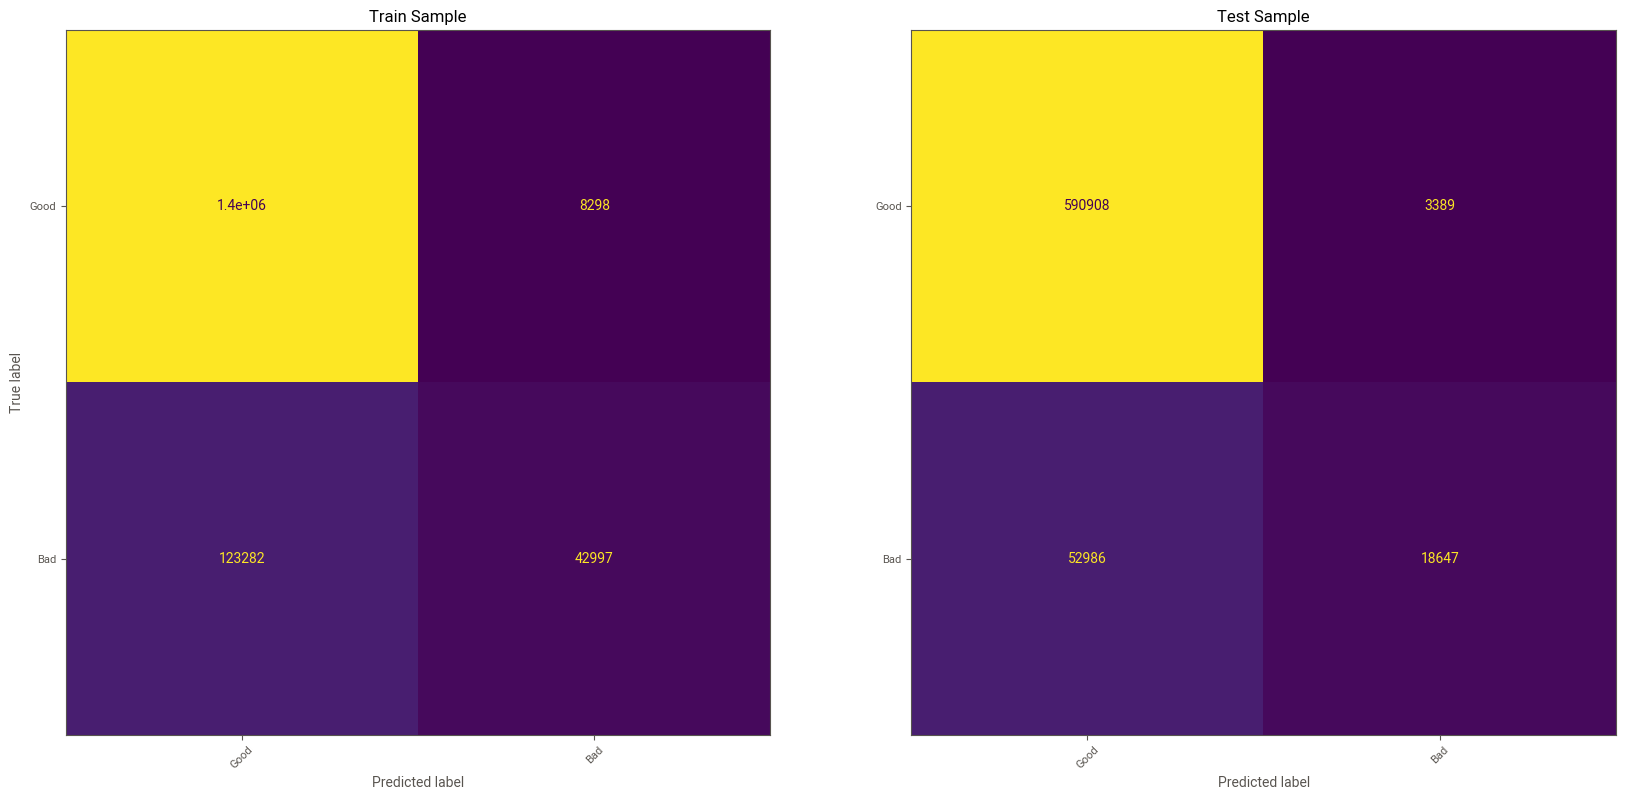

In [58]:
#Display the confusion matrix
dataList = [y_train,y_test]
predictedList = [y_train_predicted, y_test_predicted]
dataLabels = ['Train Sample','Test Sample']

fig, ax = plt.subplots(1,2, figsize = (20,20))
#plt.rcParams.update({'font.size': 20})

for i,j in enumerate(predictedList):
    confusionMatrix= confusion_matrix(dataList[i],j)
    disp = ConfusionMatrixDisplay(confusionMatrix, display_labels = ['Good','Bad'])
    disp.plot(ax=ax[i], xticks_rotation=45)
    disp.ax_.set_title(dataLabels[i])
    disp.im_.colorbar.remove()
    if i!=0:
        disp.ax_.set_ylabel('')

plt.show();

In [59]:
accTrain = np.round(accuracy_score(y_train, y_train_predicted),3)
accTest = np.round(accuracy_score(y_test, y_test_predicted),3)

print("The accuracy for the train sample is {:.3f}".format(accTrain)+".")
print("The accuracy for the test sample is {:.3f}".format(accTest)+".")

The accuracy for the train sample is 0.915.
The accuracy for the test sample is 0.915.


In [60]:
#Get a table of the observed drop-out rate for each decile calculated based on the predicted drop-out rate
y_trainedJoined = pd.DataFrame(y_train).reset_index(drop=True).join(pd.DataFrame(y_train_predicted_proba).reset_index(drop=True)).drop(columns = 0).rename(columns = {1:'badProb'})

label = list(range(10, 0, -1))
#list(range(1,11,1)
y_trainedJoined['Decile'] = pd.qcut(y_trainedJoined['badProb'],10, label )

#Count of Bads in each bin
dfTrainSubscribed = pd.DataFrame(y_trainedJoined.groupby('Decile')['y'].sum()).reset_index().rename(columns = {"y":"Bad"})

#Count of records in each bin
dfTrainTotal = pd.DataFrame(y_trainedJoined.groupby('Decile')['y'].count()).reset_index().rename(columns = {"y":"Total"})

#Generate a dataset with the drop-out rate for each decile
dfTrainStatsLRDefault = pd.merge(dfTrainSubscribed, dfTrainTotal, on = 'Decile')

dfTrainStatsLRDefault['Observed Bad Rate'] = dfTrainStatsLRDefault['Bad'] / dfTrainStatsLRDefault['Total']
dfTrainStatsLRDefault

,Decile,Bad,Total,Observed Bad Rate
0,10,79,155384,0.000508
1,9,64,155383,0.000412
2,8,237,155384,0.001525
3,7,3235,155383,0.020820
4,6,7350,155384,0.047302
5,5,11005,155383,0.070825
6,4,14715,155383,0.094701
7,3,20440,155384,0.131545
8,2,30379,155383,0.195510
9,1,78775,155384,0.506970


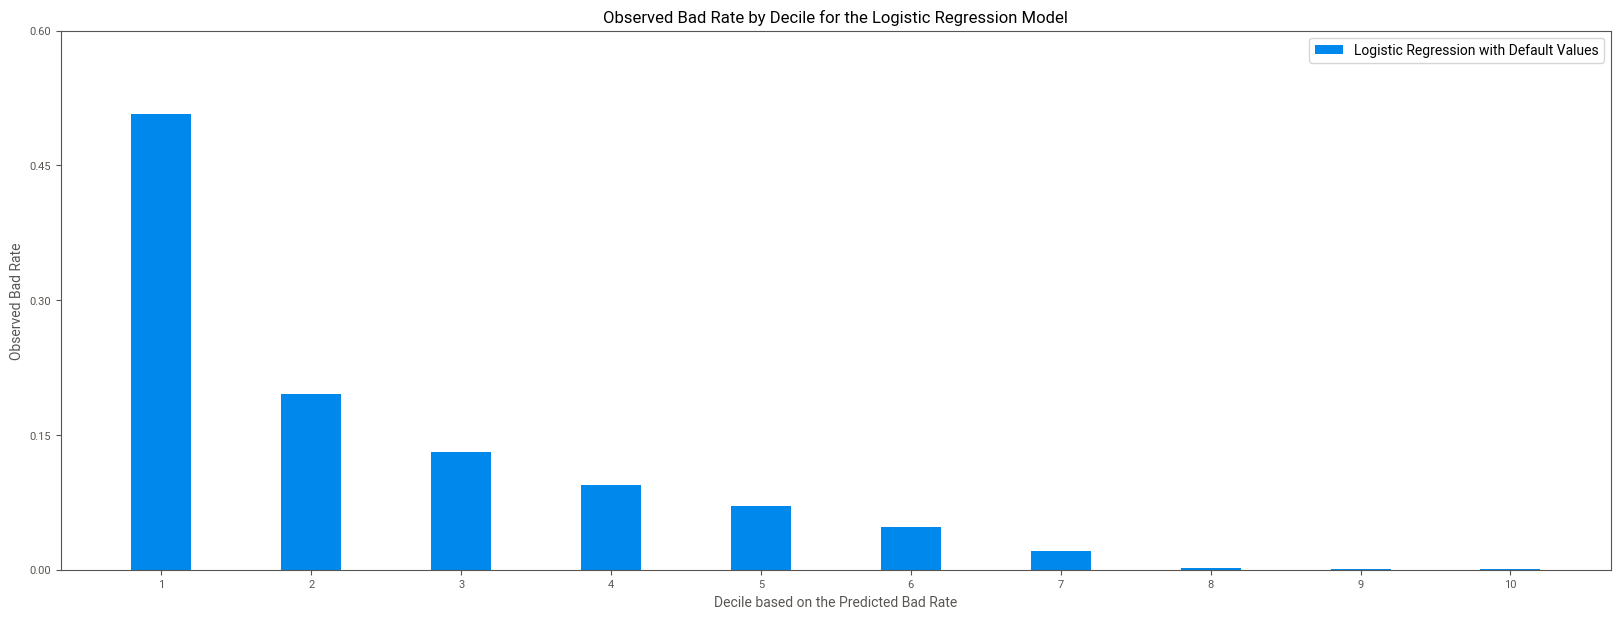

In [61]:
fig,ax = plt.subplots(figsize = (20, 7))

X_label = np.arange(1,11,1)
plt.bar(dfTrainStatsLRDefault['Decile'], dfTrainStatsLRDefault['Observed Bad Rate'],width = 0.4, label = 'Logistic Regression with Default Values')
plt.xlabel("Decile based on the Predicted Bad Rate")
plt.ylabel("Observed Bad Rate")
plt.title("Observed Bad Rate by Decile for the Logistic Regression Model")

plt.xticks(X_label)
plt.yticks(np.linspace(0,0.6,5))
plt.legend()
plt.show();

* The chart presented above illustrates the ability of the Lending Club model to rank order consumers baseed on the credit risk
* It is evident from the chart that consumers in the lower deciles have a much greater credit risk, compared to those in higher deciles (the risk ranges from 0.05% to 50% Bad rate)

## Step 8: Fine-tuning Logistic Regression Hyperparameters

In [62]:
#Scale all the variables
transformer = make_column_transformer((StandardScaler(), list(X_train.columns)),
                                      remainder = 'passthrough' )

In [63]:
#Build a pipeline for Grid Search
extractor = SelectFromModel(LogisticRegression(penalty='l1', solver = 'liblinear' ,random_state = 42))
lgr_pipe_grid = Pipeline([('transformer',transformer),
                     ('selector',extractor),
                     ('lgr',LogisticRegression( solver = 'liblinear',random_state = 42, max_iter = 100))])

In [64]:
# grid search based on 10% random sample to identify the optimal hyperparameters

from sklearn.model_selection import RandomizedSearchCV
X_train_sub = X_train.sample(frac=0.1, random_state=42)
y_train_sub = y_train.loc[X_train_sub.index]

roc_random_lgr = RandomizedSearchCV(
    lgr_pipe_grid,
    param_distributions={
        'selector__max_features': [5, 10, 15, 20],
        'lgr__penalty': ['l1', 'l2'],
        'lgr__C': [0.01, 0.1, 1, 10, 100]
    },
    n_iter=10,  # Number of parameter combinations to try
    scoring='roc_auc',
    cv=3,
    random_state=42).fit(X_train_sub, y_train_sub)

print(roc_random_lgr.best_params_)

{'selector__max_features': 20, 'lgr__penalty': 'l2', 'lgr__C': 100}


In [65]:
#Build a logistic regression model with the best parameters according to the Grid search
lgrPipe_grid = Pipeline([('transformer',transformer),
                     ('selector',SelectFromModel(LogisticRegression(penalty='l1', solver = 'liblinear' ,random_state = 42),
                      max_features = roc_random_lgr.best_params_.get('selectors__max_features'))),
                     ('lgr',LogisticRegression(penalty = roc_random_lgr.best_params_.get('lgr__penalty'), C = roc_random_lgr.best_params_.get('lgr__C'), solver = 'liblinear',random_state = 42, max_iter = 100000))]).fit(X_train,y_train)

y_train_predicted = lgrPipe_grid.predict(X_train)
y_test_predicted = lgrPipe_grid.predict(X_test)

y_train_predicted_proba = lgrPipe_grid.predict_proba(X_train)
y_test_predicted_proba = lgrPipe_grid.predict_proba(X_test)

In [66]:
#Build a logistic regression model with the best parameters according to the Grid search
# Logistic regression model for feature selection
selector_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Feature selection with exact number of features
class SelectTopK(SelectFromModel):
    def __init__(self, estimator, k=20, **kwargs):
        super().__init__(estimator=estimator, **kwargs)
        self.k = k

    def _get_support_mask(self):
        # Sort features by importance and select top k
        importance = np.abs(self.estimator_.coef_).flatten()
        top_k_indices = np.argsort(importance)[-self.k:]
        mask = np.zeros_like(importance, dtype=bool)
        mask[top_k_indices] = True
        return mask

# Pipeline with custom feature selector
lgrPipe_grid = Pipeline([
    ('transformer', transformer),  # Preprocessing step
    ('selector', SelectTopK(selector_model, k=20)),  # Select top 20 features
    ('lgr', LogisticRegression(penalty='l2', C=100, solver='liblinear', random_state=42, max_iter=100000))
])

# Fit the pipeline
lgrPipe_grid.fit(X_train, y_train)

# Predictions
y_train_predicted = lgrPipe_grid.predict(X_train)
y_test_predicted = lgrPipe_grid.predict(X_test)
y_train_predicted_proba = lgrPipe_grid.predict_proba(X_train)
y_test_predicted_proba = lgrPipe_grid.predict_proba(X_test)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['loan_amnt', 'int_rate',
                                                   'installment', 'annual_inc',
                                                   'dti', 'delinq_2yrs',
                                                   'inq_last_6mths',
                                                   'mths_since_last_delinq',
                                                   'mths_since_last_record',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc', 'total_pymnt',
                                                   'last_pymnt_amnt',...
                                                   'mths_since_recent_revol_delinq',
                                                   'term_mapped',
                                                   'grade_mapped',
                                                   'emp_length_mapped',
                                                   'verification_status_mapped',
                                                   'hardship_flag_mapped',
                                                   'debt_settlement_flag_mapped',
                                                   'MORTGAGE', ...])])),
                ('selector',
                 SelectTopK(estimator=LogisticRegression(penalty='l1',
                                                         random_state=42,
                                                         solver='liblinear'))),
                ('lgr',
                 LogisticRegression(C=100, max_iter=100000, random_state=42,
                                    solver='liblinear'))])

In [67]:
# Access selected features
selector = lgrPipe_grid.named_steps['selector']
selected_features = X_train.columns[selector.get_support()]

# Logistic regression coefficients
logistic_model = lgrPipe_grid.named_steps['lgr']
coefficients = logistic_model.coef_[0]

# Combine for interpretability
import pandas as pd
coef_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)

                        Feature  Coefficient
12                 grade_mapped     1.773589
2                   installment     1.445669
15  debt_settlement_flag_mapped     0.710759
18                         RENT     0.452070
16                     MORTGAGE     0.376959
8                     total_acc     0.320256
11                  term_mapped     0.301911
17                          OWN     0.250685
13   verification_status_mapped     0.220789
5                inq_last_6mths     0.207608
7                    revol_util     0.188359
19           debt_consolidation     0.085522
6                      open_acc    -0.082896
4                           dti    -0.135071
14         hardship_flag_mapped    -0.163100
3                    annual_inc    -0.435466
0                     loan_amnt    -0.747548
9                   total_pymnt    -0.999066
1                      int_rate    -1.285090
10              last_pymnt_amnt    -6.552835


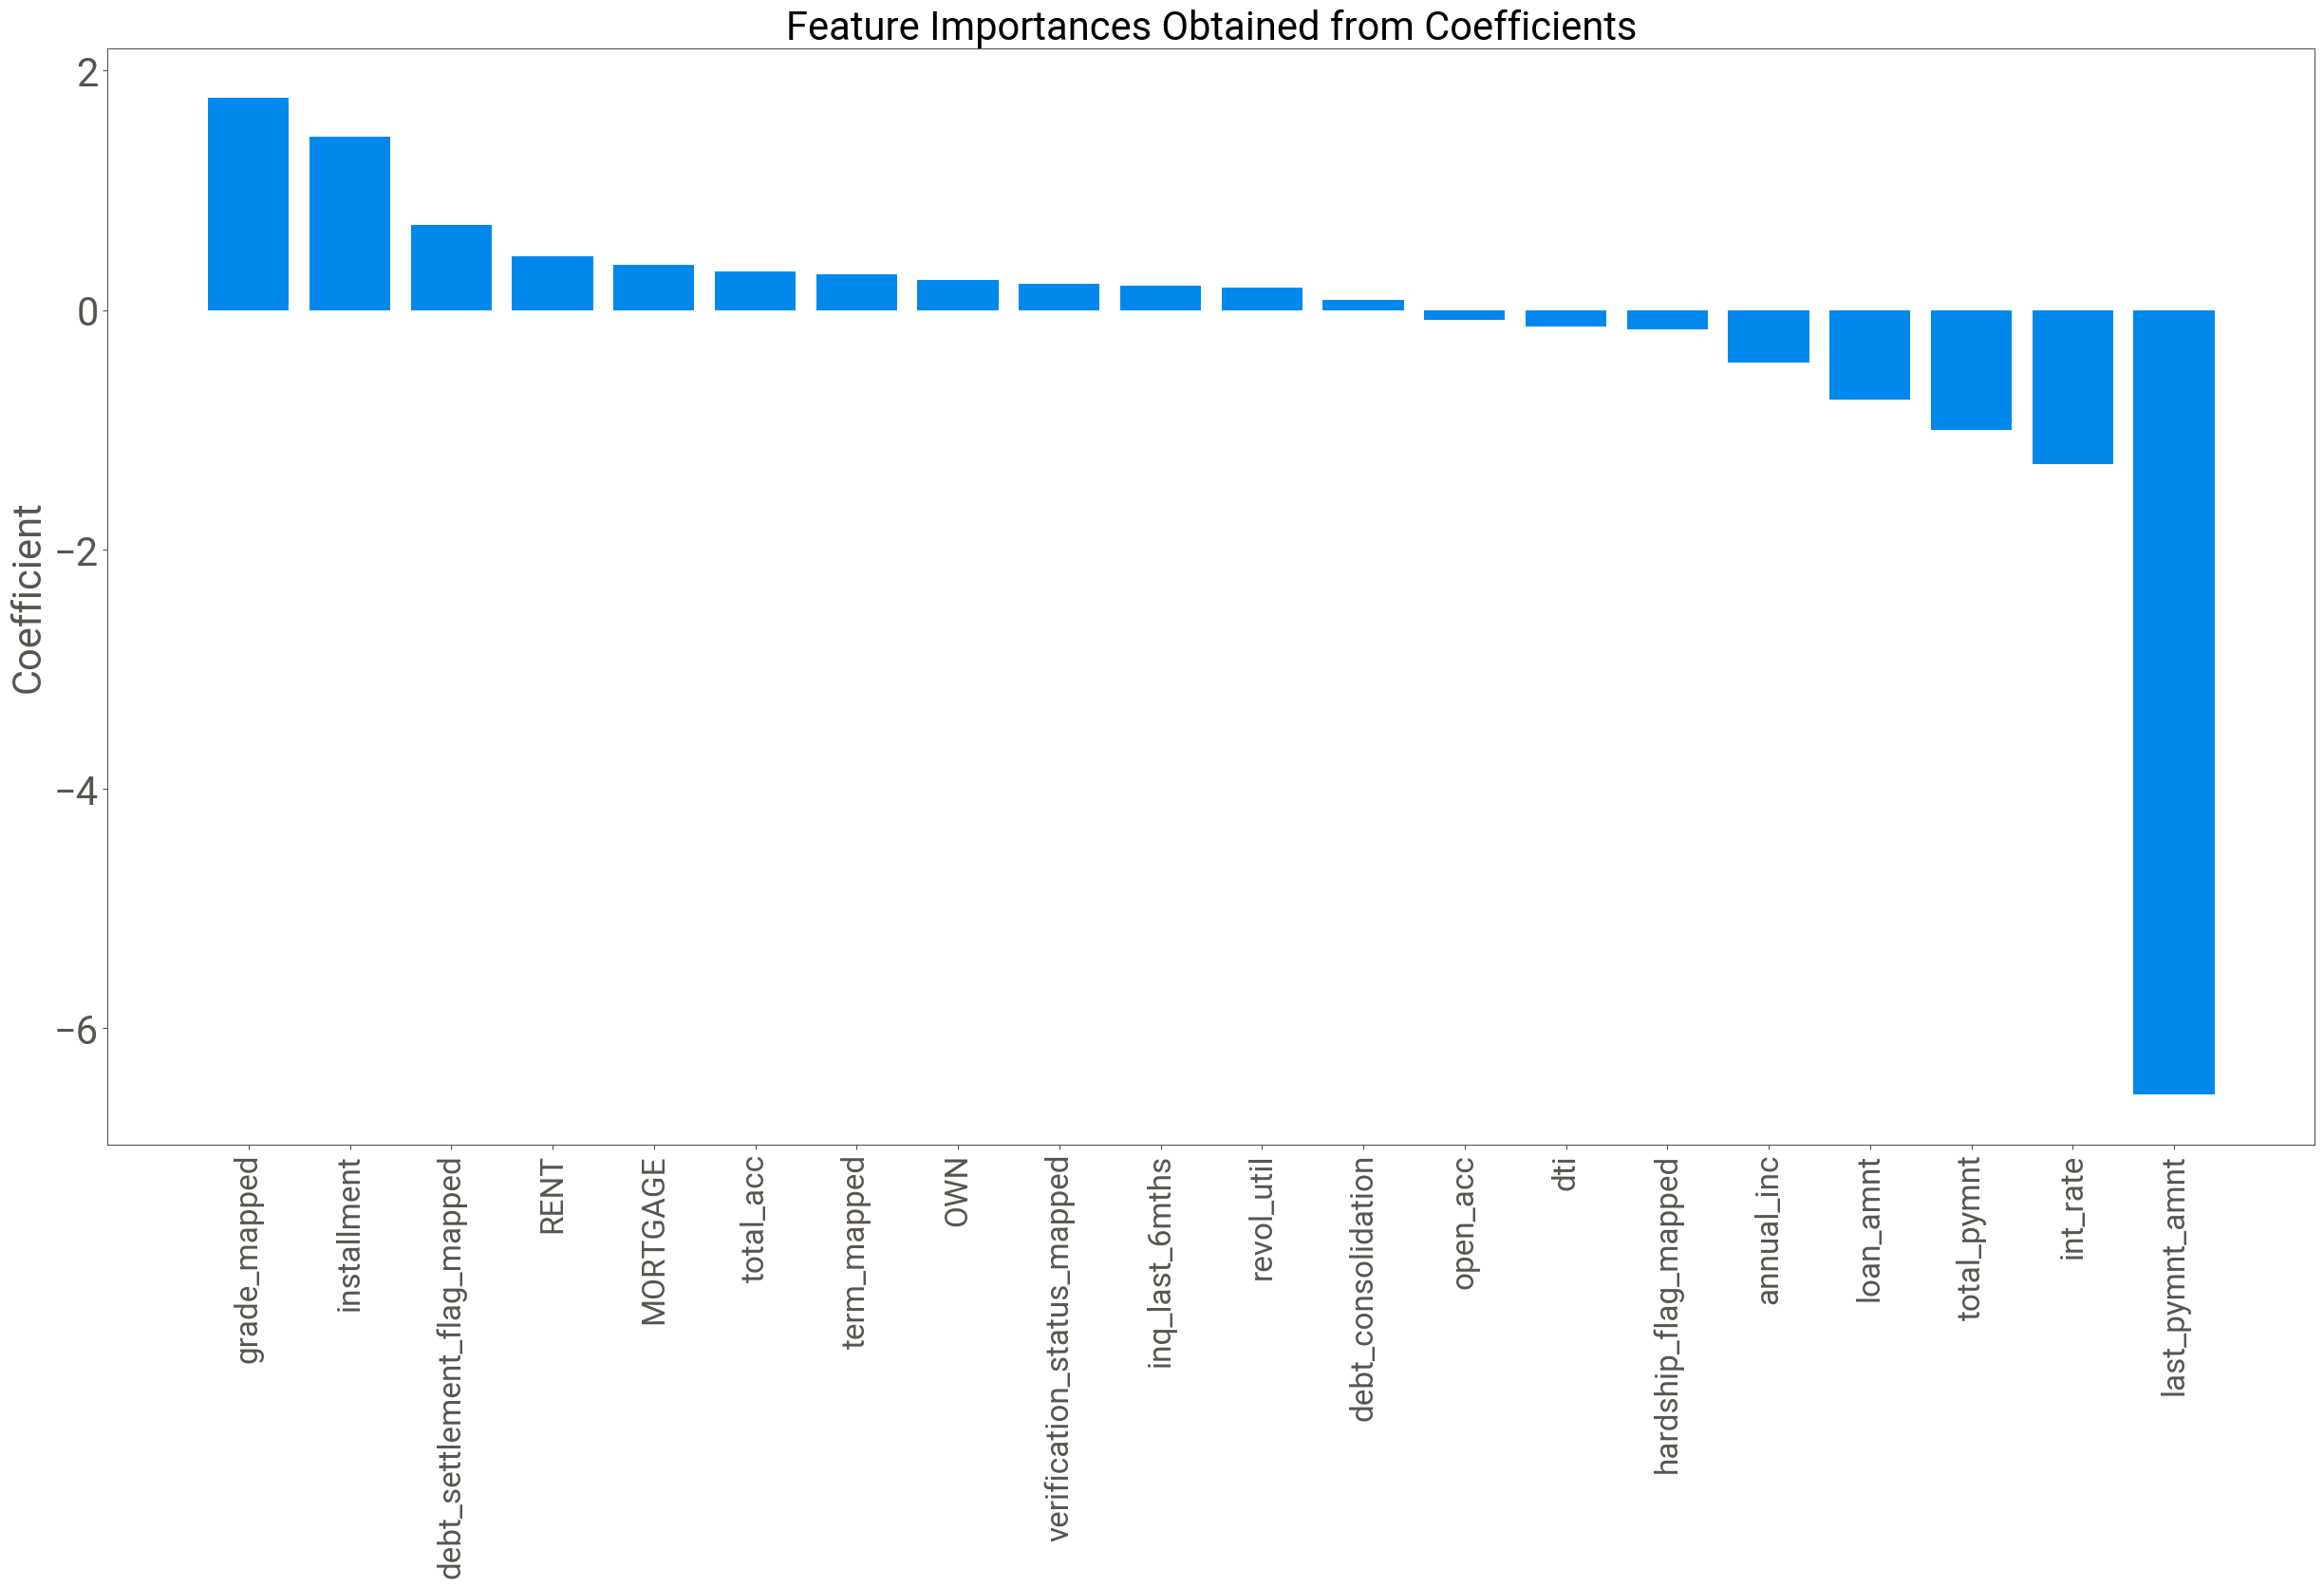

In [68]:
fig, ax = plt.subplots(1, figsize = (30, 15))
ax.bar(x=coef_df['Feature'], height=coef_df['Coefficient'])
ax.set_title('Feature Importances Obtained from Coefficients', size = 30)
ax.set_ylabel('Coefficient', fontsize = 30)
ax.tick_params(axis = 'x',labelrotation=90, labelsize=24)
ax.tick_params(axis = 'y', labelsize=30)
plt.show();

In [69]:
#Generate performance metrics

accuracyScoreTrain = []
accuracyScoreTest = []

precisionScoreTrain = []
precisionScoreTest = []

recallScoreTrain = []
recallScoreTest = []

f1ScoreTrain = []
f1ScoreTest = []

accuracyScoreTrain.append(np.round(accuracy_score(y_train, y_train_predicted),3))
accuracyScoreTest.append(np.round(accuracy_score(y_test, y_test_predicted),3))
    
precisionScoreTrain.append(np.round(precision_score(y_train, y_train_predicted),3))
precisionScoreTest.append(np.round(precision_score(y_test, y_test_predicted),3))
    
recallScoreTrain.append(np.round(recall_score(y_train, y_train_predicted),3))
recallScoreTest.append(np.round(recall_score(y_test, y_test_predicted),3))
    
f1ScoreTrain.append(np.round(f1_score(y_train, y_train_predicted),3))
f1ScoreTest.append(np.round(f1_score(y_test, y_test_predicted),3))

In [70]:
#Summarize results
listOfModels = ['Optimized Logistic Regression']

dfStats = pd.DataFrame(zip(listOfModels, accuracyScoreTrain, accuracyScoreTest,precisionScoreTrain, precisionScoreTest, recallScoreTrain, recallScoreTest, f1ScoreTrain, f1ScoreTest), 
                       columns = ['Model','Train Accuracy','Test Accuracy', 'Train Precision', 'Test Precision', 'Train Recall','Test Recall','F1-Score Train','F1-Score Test'])

dfStats

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,F1-Score Train,F1-Score Test
0,Optimized Logistic Regression,0.915,0.915,0.838,0.844,0.257,0.258,0.393,0.395


Grid search did not seem to improve the performance of the  logistic regression model. Below is the final ROC curve for the logistic regression model, which demonstrates good separation between Good and Bad consumers.

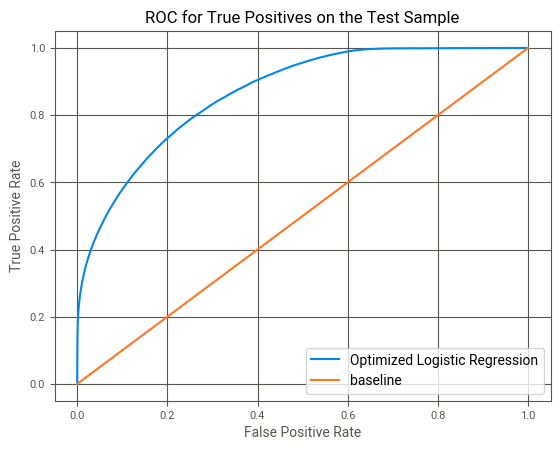

In [71]:
#ROC for logistic regression
labels = 'Optimized Logistic Regression'

fig, ax = plt.subplots()

RocCurveDisplay.from_estimator(lgrPipe_grid, X_test, y_test,ax=ax,label = labels)

plt.grid()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for True Positives on the Test Sample')
plt.legend();

## Step 9: Random Forest analysis

In [101]:
# Grid search based on 10% random sample to identify the optimal hyperparameters
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

# Define the Hyperparameter Grid
grid_params = {
    "n_estimators": [50, 100, 200],            # Number of trees
    "max_depth": [10, 20],              # Depth of trees
    "min_samples_split": [200, 500, 1000],          # Minimum samples required to split a node
    "min_samples_leaf": [100, 200, 500],            # Minimum samples required in a leaf node
    "max_features": ["sqrt", None], # Number of features to consider at each split
    "class_weight": [None, "balanced"]        # Handle class imbalance
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=grid_params, 
                           cv=3, scoring="accuracy", verbose=0, n_jobs=-1)
grid_search.fit(X_train_sub, y_train_sub)

# Best Parameters and Best Score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [10, 20], 'max_features': ['sqrt', None],
                         'min_samples_leaf': [100, 200, 500],
                         'min_samples_split': [200, 500, 1000],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

Best Parameters: {'class_weight': None, 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}
Best Cross-Validation Score: 0.9248378279676466


In [102]:
# Evaluate the Best Model on Test Data

best_model = grid_search.best_estimator_

# Predictions
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Performance Metrics
def calculate_metrics(y_true, y_pred, dataset="Dataset"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="weighted")
    recall = recall_score(y_true, y_pred, average="weighted")
    f1 = f1_score(y_true, y_pred, average="weighted")
    print(f"\nPerformance on {dataset}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")


calculate_metrics(y_train, y_train_pred, dataset="Train")
calculate_metrics(y_test, y_test_pred, dataset="Test")



Performance on Train:
Accuracy: 0.9272
Precision: 0.9286
Recall: 0.9272
F1 Score: 0.9114

Performance on Test:
Accuracy: 0.9269
Precision: 0.9282
Recall: 0.9269
F1 Score: 0.9110



Variable Importance:
                           Feature    Importance
28     debt_settlement_flag_mapped  2.707410e-01
1                         int_rate  1.940095e-01
14                     total_pymnt  1.343488e-01
24                    grade_mapped  1.198871e-01
15                 last_pymnt_amnt  1.089954e-01
0                        loan_amnt  7.812384e-02
2                      installment  4.490854e-02
13                       total_acc  1.112269e-02
3                       annual_inc  6.486952e-03
12                      revol_util  5.215842e-03
26      verification_status_mapped  4.133345e-03
6                   inq_last_6mths  3.936807e-03
4                              dti  2.976932e-03
11                       revol_bal  2.961778e-03
21           mths_since_recent_inq  2.869043e-03
23                     term_mapped  2.682827e-03
7           mths_since_last_delinq  1.371069e-03
25               emp_length_mapped  1.102387e-03
8           mths_since_last_record  1.052731e-0

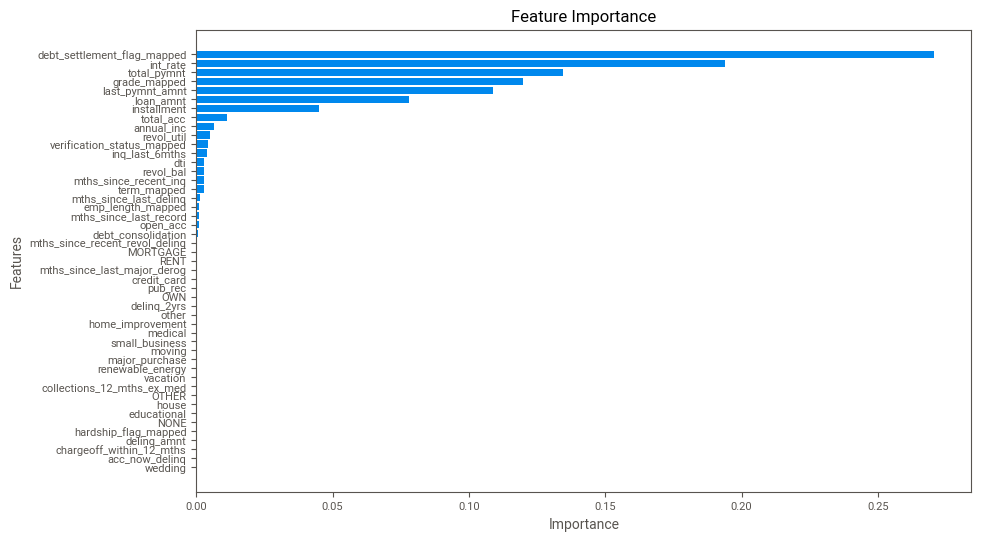

In [103]:
# Variable Importance
importances = best_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Display and Plot Variable Importance
print("\nVariable Importance:")
print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.gca().invert_yaxis()
plt.show();

As it can be seen, the top 10 most important features from Random forest are consistent with the features which came from the Optimized Logistic Regression. 

## Step 10: Model Comparison

In [92]:
#Build K-Nearest Neighbor, decision classifier, SVN and random forest models with default parameters
modelList = [KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2),
             LogisticRegression(penalty = roc_random_lgr.best_params_.get('lgr__penalty'), C = roc_random_lgr.best_params_.get('lgr__C'), solver = 'liblinear',random_state = 42, max_iter = 100),
             DecisionTreeClassifier(random_state = 42,min_samples_split=0.05,max_depth=10),
             SVC(kernel='rbf', C=1, gamma=0.1, max_iter=100,random_state = 42),
            best_model]

In [93]:
#Train K-Nearest Neighbor, logistic regression, decision classifier, SVN and Random forest models on 10% sample
runTime = []
accuracyScoreTrain = []
accuracyScoreTest = []

precisionScoreTrain = []
precisionScoreTest = []

recallScoreTrain = []
recallScoreTest = []

f1ScoreTrain = []
f1ScoreTest = []


for i in range(len(modelList)):
    t1 = timeit.default_timer()
    modelPipe = Pipeline([('transformer',transformer),
                     ('model',modelList[i])]).fit(X_train_sub,y_train_sub)
    t2 = timeit.default_timer()
    runTime.append(np.round((t2-t1),2))
    
    y_train_predicted = modelPipe.predict(X_train_sub)
    y_test_predicted = modelPipe.predict(X_test_sub)
    
    accuracyScoreTrain.append(np.round(accuracy_score(y_train_sub, y_train_predicted),3))
    accuracyScoreTest.append(np.round(accuracy_score(y_test_sub, y_test_predicted),3))
    
    precisionScoreTrain.append(np.round(precision_score(y_train_sub, y_train_predicted),3))
    precisionScoreTest.append(np.round(precision_score(y_test_sub, y_test_predicted),3))
    
    recallScoreTrain.append(np.round(recall_score(y_train_sub, y_train_predicted),3))
    recallScoreTest.append(np.round(recall_score(y_test_sub, y_test_predicted),3))
    
    f1ScoreTrain.append(np.round(f1_score(y_train_sub, y_train_predicted),3))
    f1ScoreTest.append(np.round(f1_score(y_test_sub, y_test_predicted),3))
    

In [94]:
#Summarize results
listOfModels = ['kNN','Optimized Logistic Regression','Decision Tree','SVM','Random Forest']

dfStats = pd.DataFrame(zip(listOfModels, runTime, accuracyScoreTrain, accuracyScoreTest,precisionScoreTrain, precisionScoreTest, recallScoreTrain, recallScoreTest, f1ScoreTrain, f1ScoreTest), 
                       columns = ['Model','Train Time (in seconds)','Train Accuracy','Test Accuracy', 'Train Precision', 'Test Precision', 'Train Recall','Test Recall','F1-Score Train','F1-Score Test'])

dfStats

,Model,Train Time (in seconds),Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,F1-Score Train,F1-Score Test
0,kNN,0.41,0.930,0.889,0.806,0.487,0.452,0.262,0.579,0.340
1,Optimized Logistic Regression,2.05,0.916,0.913,0.842,0.855,0.253,0.254,0.389,0.392
2,Decision Tree,1.15,0.908,0.905,0.924,0.916,0.145,0.148,0.250,0.255
3,SVM,1.07,0.891,0.887,0.219,0.186,0.013,0.010,0.024,0.019
4,Random Forest,171.09,0.928,0.925,0.944,0.946,0.343,0.338,0.504,0.498


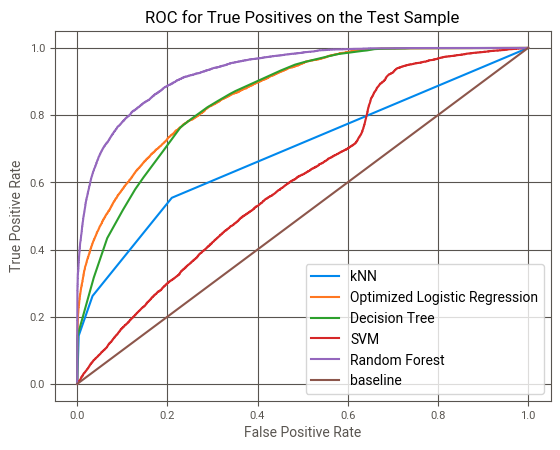

In [95]:
#ROC for kNN, logistic regression, decision tree and SVM
labels = ['kNN', 'Optimized Logistic Regression', 'Decision Tree', 'SVM','Random Forest']

fig, ax = plt.subplots()

for i in range(len(modelList)):
    modelPipe = Pipeline([('transformer',transformer),
                     ('model',modelList[i])]).fit(X_train_sub,y_train_sub)
    RocCurveDisplay.from_estimator(modelPipe, X_test_sub, y_test_sub,ax=ax,label = labels[i])

plt.grid()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for True Positives on the Test Sample')
plt.legend();

### Model Comparison findings:

Random Forest demonstartes the highest lift on test sample, followed by Optimized Logistic Regression and Decision Tree models. It is important to note the run time for the Random Forest is significantly longer than for all other models.

Additionally, explainability of the model is another important consideration for credit risk assessment. Reason codes explaining why the consumer's score wasn't the highest are a mandatory regulatory requirement in the US. That being said, the Optimized Logistic Regression model is the best choice, due to the model's performance and clear interpretation of the factors driving the credit risk.                                                                                                                                                                                                                                   


## Step 11: FICO score performance

In [96]:
# Prapare the data for FICO score performance analysis
y_train_df = y_train.to_frame(name='y')
y_train_df.head()

y_test_df = y_test.to_frame(name='y')


,y
1282995,0
347233,1
1349238,0
1440071,0
1496286,0


In [97]:
# Separate fico scores
X_fico = X_train1.loc[:, X_train1.columns.str.contains('fico')]
X_fico_test = X_test1.loc[:, X_test1.columns.str.contains('fico')]
# Add 'y' column

df_fico = pd.concat([X_fico, y_train_df[['y']]], axis=1)
df_fico_test = pd.concat([X_fico_test, y_test_df[['y']]], axis=1)
df_fico.head()

,fico_range_low,fico_range_high,last_fico_range_high,last_fico_range_low,y
1282995,790.0,794.0,809.0,805.0,0
347233,660.0,664.0,534.0,530.0,1
1349238,680.0,684.0,654.0,650.0,0
1440071,760.0,764.0,819.0,815.0,0
1496286,675.0,679.0,659.0,655.0,0


In [98]:
df_fico['Decile'] = pd.qcut(df_fico['last_fico_range_low'], q=10, labels=list(range(1,11,1)))
#list(range(10, 0, -1)

#Count of Bads in each bin
dfTrainSubscribed_fico = pd.DataFrame(df_fico.groupby('Decile')['y'].sum()).reset_index().rename(columns = {"y":"Bad"})

#Count of records in each bin
dfTrainTotal_fico = pd.DataFrame(df_fico.groupby('Decile')['y'].count()).reset_index().rename(columns = {"y":"Total"})

#Generate a dataset with the drop-out rate for each decile
dfTrainStatsLRDefault_fico = pd.merge(dfTrainSubscribed_fico, dfTrainTotal_fico, on = 'Decile')

dfTrainStatsLRDefault_fico['Observed Bad Rate'] = dfTrainStatsLRDefault_fico['Bad'] / dfTrainStatsLRDefault_fico['Total']
dfTrainStatsLRDefault_fico

,Decile,Bad,Total,Observed Bad Rate
0,1,103626,160087,0.647311
1,2,46068,167651,0.274785
2,3,8709,156173,0.055765
3,4,2829,149092,0.018975
4,5,1706,169798,0.010047
5,6,1179,170750,0.006905
6,7,775,153024,0.005065
7,8,486,122144,0.003979
8,9,467,161736,0.002887
9,10,434,143380,0.003027


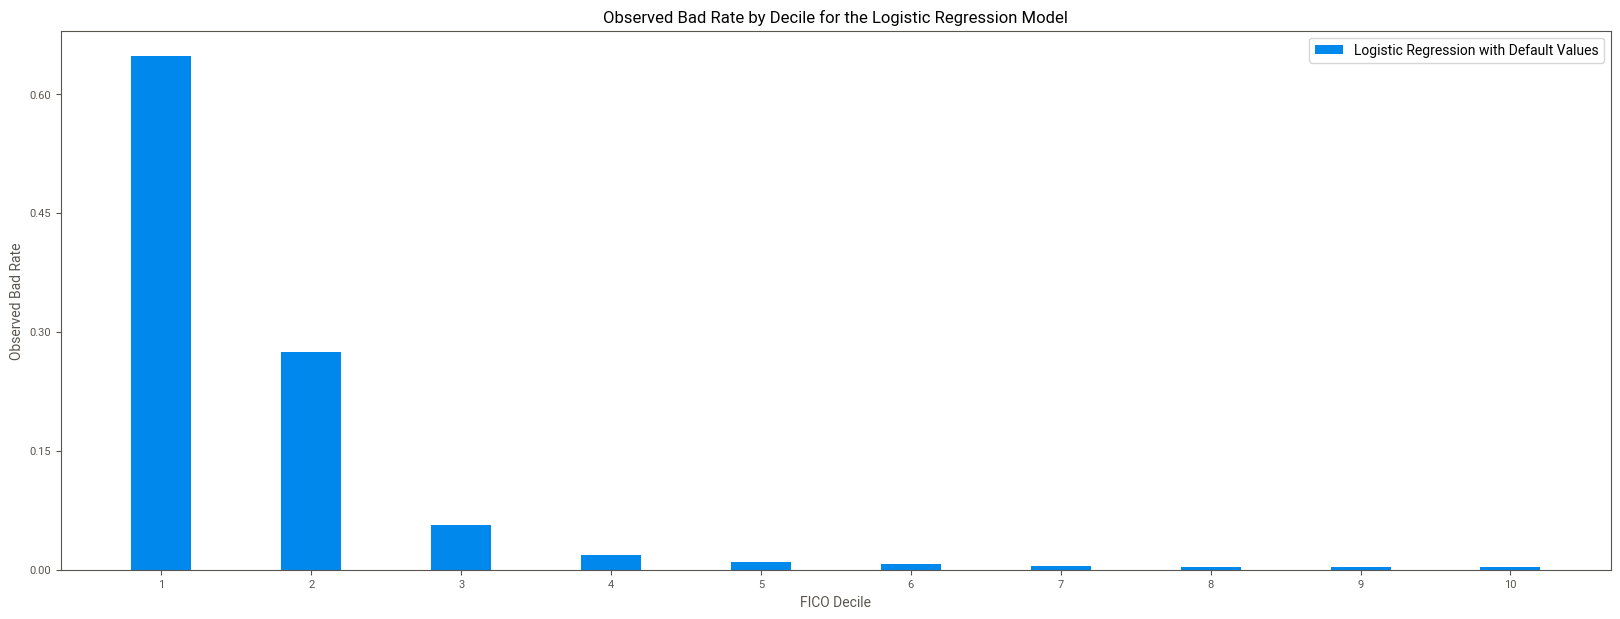

In [99]:
fig,ax = plt.subplots(figsize = (20, 7))

X_label = np.arange(1,11,1)
plt.bar(dfTrainStatsLRDefault_fico['Decile'], dfTrainStatsLRDefault_fico['Observed Bad Rate'],width = 0.4, label = 'Logistic Regression with Default Values')
plt.xlabel("FICO Decile")
plt.ylabel("Observed Bad Rate")
plt.title("Observed Bad Rate by Decile for the Logistic Regression Model")

plt.xticks(X_label)
plt.yticks(np.linspace(0,0.6,5))
plt.legend()
plt.show();

* The chart presented above illustrates the ability of the FICO score to rank order consumers based on the credit risk
* It is evident from the chart that consumers in the lower deciles have a much greater credit risk, compared to those in higher deciles (the risk ranges from 0.3% to 64% Bad rate)

In [100]:
# Evaluate with Confusion Matrix on train at a specific threshold
threshold = 600  # Example cutoff
df_fico['Predicted_Bad'] = np.where(df_fico['last_fico_range_low'] < threshold, 1, 0)
conf_matrix_train = confusion_matrix(df_fico['y'], df_fico['Predicted_Bad'])

# Calculate Metrics on Train
accuracyScoreTrain = accuracy_score(df_fico['y'], df_fico['Predicted_Bad'])
precisionScoreTrain = precision_score(df_fico['y'], df_fico['Predicted_Bad'])
recallScoreTrain = recall_score(df_fico['y'], df_fico['Predicted_Bad'])
f1ScoreTrain = f1_score(df_fico['y'], df_fico['Predicted_Bad'])

# Evaluate with Confusion Matrix on test at a specific threshold
df_fico_test['Predicted_Bad'] = np.where(df_fico_test['last_fico_range_low'] < threshold, 1, 0)
conf_matrix_test = confusion_matrix(df_fico_test['y'], df_fico_test['Predicted_Bad'])

# Calculate Metrics on Test
accuracyScoreTest = accuracy_score(df_fico_test['y'], df_fico_test['Predicted_Bad'])
precisionScoreTest = precision_score(df_fico_test['y'], df_fico_test['Predicted_Bad'])
recallScoreTest = recall_score(df_fico_test['y'], df_fico_test['Predicted_Bad'])
f1ScoreTest = f1_score(df_fico_test['y'], df_fico_test['Predicted_Bad'])

# Summarize Results
listOfModels = ['FICO Score']
dfStats = pd.DataFrame({
    'Model': listOfModels,
    'Train Accuracy': [accuracyScoreTrain],
    'Test Accuracy': [accuracyScoreTest],
    'Train Precision': [precisionScoreTrain],
    'Test Precision': [precisionScoreTest],
    'Train Recall': [recallScoreTrain],
    'Test Recall': [recallScoreTest],
    'F1-Score Train': [f1ScoreTrain],
    'F1-Score Test': [f1ScoreTest]
})

dfStats


,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,F1-Score Train,F1-Score Test
0,FICO Score,0.920568,0.920032,0.610559,0.610433,0.711653,0.709156,0.657241,0.656102


### Key Takeaways:
1. Comparison of the Lending Club custom model with the FICO score (broad based  consortium model) demonstrated similar performance, with FICO score slightly outperforming the custom Lending club model both in rank ordering and performance metrics.

2. Based on the results outlined above, it is recommended to use the custom built model with the FICO scores for credit decisioning, especially for swap-in opportunities.

